In [50]:
#  https://www.jianshu.com/p/5db596333dfb

In [1]:
setwd('/import/hd/sc')

In [2]:
library(nichenetr)
library(Seurat) # please update to Seurat V4
library(tidyverse)

Warning message:
"package 'nichenetr' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R versio

In [63]:
options(repr.plot.width = 15)

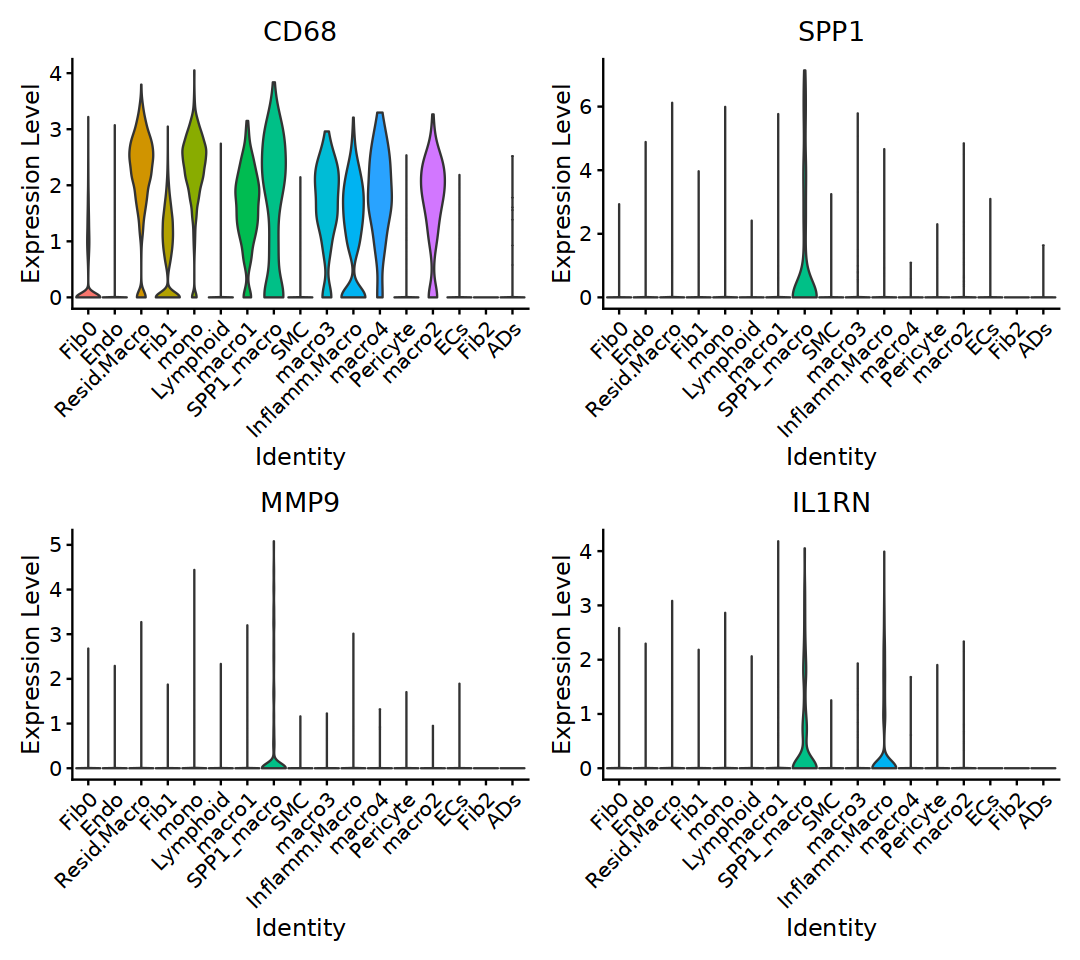

In [67]:
VlnPlot(seuratObj,features = c('CD68','SPP1','MMP9','IL1RN'),pt.size = 0,ncol = 2)

In [3]:
seuratObj <- readRDS('./sce2.merged.rds')
seuratObj@meta.data %>% head()
seuratObj@meta.data$celltype %>% table() 

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.8,seurat_clusters,RNA_snn_res.0.2,group,RNA_snn_res.0.1,RNA_snn_res.0.05,RNA_snn_res.0.01,celltype
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<chr>
AAACCCAAGAGCTGCA-1_1,OA_1,2943.740,2444,6.932801,1,0,0,OA,0,0,0,Fib0
AAACCCAAGATACTGA-1_1,OA_1,2711.597,1861,7.326082,18,2,4,OA,4,1,2,Endo
AAACCCAAGGTTAGTA-1_1,OA_1,3130.363,3134,8.936478,16,0,0,OA,0,0,0,Fib0
AAACCCAAGTCCCGGT-1_1,OA_1,2801.367,1764,6.752836,7,1,3,OA,3,3,1,Resid.Macro
AAACCCACACTTCTCG-1_1,OA_1,3304.690,3167,4.371079,1,0,0,OA,0,0,0,Fib0
AAACCCAGTAGCTAAA-1_1,OA_1,3042.776,3386,13.734073,2,0,1,OA,1,0,0,Fib1


.
          ADs           ECs          Endo          Fib0          Fib1 
           39           642          8181         20971         12432 
         Fib2 Inflamm.Macro      Lymphoid      Pericyte   Resid.Macro 
            2          1469          3964          2143          3012 
          SMC    SPP1_macro        macro1        macro2        macro3 
         3251           372           989           202           197 
       macro4          mono 
           63          3921 

In [5]:
seurat_obj = seuratObj

In [7]:
seurat_obj@meta.data$celltype_aggregate = paste(seurat_obj@meta.data$celltype, seurat_obj@meta.data$group,sep = "_") # user adaptation required on own dataset
#DimPlot(seurat_obj, group.by = "celltype_aggregate")

In [8]:
table(seurat_obj@meta.data$celltype, seurat_obj@meta.data$group)

               
                Healthy    OA
  ADs                34     5
  ECs               594    48
  Endo             4930  3251
  Fib0            10914 10057
  Fib1             5630  6802
  Fib2                0     2
  Inflamm.Macro    1041   428
  Lymphoid         1444  2520
  Pericyte         1828   315
  Resid.Macro      2208   804
  SMC              2203  1048
  SPP1_macro        214   158
  macro1            535   454
  macro2            149    53
  macro3            163    34
  macro4             36    27
  mono             1231  2690

In [9]:
seurat_obj@meta.data$celltype_aggregate %>% table() %>% sort(decreasing = TRUE)

.
         Fib0_Healthy               Fib0_OA               Fib1_OA 
                10914                 10057                  6802 
         Fib1_Healthy          Endo_Healthy               Endo_OA 
                 5630                  4930                  3251 
              mono_OA           Lymphoid_OA   Resid.Macro_Healthy 
                 2690                  2520                  2208 
          SMC_Healthy      Pericyte_Healthy      Lymphoid_Healthy 
                 2203                  1828                  1444 
         mono_Healthy                SMC_OA Inflamm.Macro_Healthy 
                 1231                  1048                  1041 
       Resid.Macro_OA           ECs_Healthy        macro1_Healthy 
                  804                   594                   535 
            macro1_OA      Inflamm.Macro_OA           Pericyte_OA 
                  454                   428                   315 
   SPP1_macro_Healthy        macro3_Healthy         SPP1_mac

In [10]:
celltype_id = "celltype_aggregate" # metadata column name of the cell type of interest
seurat_obj = SetIdent(seurat_obj, value = seurat_obj[[celltype_id]])

In [11]:
organism = "human"
lr_network = readRDS("/import/DB/nichenetr/lr_network_human_21122021.rds")

In [12]:
ligand_target_matrix=readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
weighted_networks = readRDS("/import/DB/nichenetr/weighted_networks_nsga2r_final.rds")
ligand_target_matrix <- readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns

,A2M,AANAT,ABCA1,ACE,ACE2
A-GAMMA3'E,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
A1BG,0.0018503922,0.0011108718,0.0014225077,0.0028594037,0.001139013
A1BG-AS1,0.0007400797,0.0004677614,0.0005193137,0.0007836698,0.000375007
A1CF,0.0024799266,0.0013026348,0.0020420890,0.0047921048,0.003273375
A2M,0.0084693452,0.0040689323,0.0064256379,0.0105191365,0.005719199


In [13]:
lr_network <- readRDS('/import/DB/nichenetr/lr_network_human_21122021.rds')
# lr_network = lr_network %>% distinct(from, to)
# head(lr_network)

In [14]:
lr_network = lr_network %>% mutate(bonafide = ! database %in% c("ppi_prediction","ppi_prediction_go"))
lr_network = lr_network %>% dplyr::rename(ligand = from, receptor = to) %>% distinct(ligand, receptor, bonafide)

In [15]:
head(lr_network)

ligand,receptor,bonafide
<chr>,<chr>,<lgl>
A2M,MMP2,TRUE
A2M,MMP9,TRUE
A2M,LRP1,TRUE
A2M,KLK3,TRUE
AANAT,MTNR1A,TRUE
AANAT,MTNR1B,TRUE


In [16]:
# weighted_networks <- readRDS('/import/DB/nichenetr/weighted_networks_nsga2r_final.rds')
# weighted_networks_lr = weighted_networks$lr_sig %>% inner_join(lr_network, by = c("from","to"))
# head(weighted_networks$lr_sig)

In [17]:
# organism = "human" # user adaptation required on own dataset
# if(organism == "mouse"){
#   lr_network = lr_network %>% mutate(ligand = convert_human_to_mouse_symbols(ligand), receptor = convert_human_to_mouse_symbols(receptor)) %>% drop_na()

#   colnames(ligand_target_matrix) = ligand_target_matrix %>% colnames() %>% convert_human_to_mouse_symbols()
#   rownames(ligand_target_matrix) = ligand_target_matrix %>% rownames() %>% convert_human_to_mouse_symbols()
#   ligand_target_matrix = ligand_target_matrix %>% .[!is.na(rownames(ligand_target_matrix)), !is.na(colnames(ligand_target_matrix))]
# }

In [18]:
niches = list(
  "neiche_OA7" = list(
    "sender" = c("SPP1_macro_OA"),
    "receiver" = c("Inflamm.Macro_OA")),
  "neiche_N2" = list(
    "sender" = c("SPP1_macro_Healthy"),
    "receiver" = c("Inflamm.Macro_Healthy"))
  )

In [19]:
Idents(seurat_obj) = 'celltype_aggregate'

In [20]:
table(seurat_obj$celltype_aggregate)


          ADs_Healthy                ADs_OA           ECs_Healthy 
                   34                     5                   594 
               ECs_OA          Endo_Healthy               Endo_OA 
                   48                  4930                  3251 
         Fib0_Healthy               Fib0_OA          Fib1_Healthy 
                10914                 10057                  5630 
              Fib1_OA               Fib2_OA Inflamm.Macro_Healthy 
                 6802                     2                  1041 
     Inflamm.Macro_OA      Lymphoid_Healthy           Lymphoid_OA 
                  428                  1444                  2520 
     Pericyte_Healthy           Pericyte_OA   Resid.Macro_Healthy 
                 1828                   315                  2208 
       Resid.Macro_OA           SMC_Healthy                SMC_OA 
                  804                  2203                  1048 
   SPP1_macro_Healthy         SPP1_macro_OA        macro1_Hea

In [21]:
assay_oi = "RNA" # other possibilities: RNA,...
DE_sender = calculate_niche_de(seurat_obj = seurat_obj %>% subset(features = lr_network$ligand %>% unique()), 
                               niches = niches, type = "sender", assay_oi = assay_oi)

[1] "Calculate Sender DE between: SPP1_macro_OA and SPP1_macro_Healthy"
[1] "Calculate Sender DE between: SPP1_macro_Healthy and SPP1_macro_OA"


In [22]:
DE_receiver = calculate_niche_de(seurat_obj = seurat_obj %>% subset(features = lr_network$receptor %>% unique()), 
                                 niches = niches, type = "receiver", assay_oi = assay_oi)

# A tibble: 1 x 2
  receiver         receiver_other_niche 
  <chr>            <chr>                
1 Inflamm.Macro_OA Inflamm.Macro_Healthy
[1] "Calculate receiver DE between: Inflamm.Macro_OA and Inflamm.Macro_Healthy"
[1] "Calculate receiver DE between: Inflamm.Macro_Healthy and Inflamm.Macro_OA"


In [23]:
DE_sender = DE_sender %>% mutate(avg_log2FC = ifelse(avg_log2FC == Inf, max(avg_log2FC[is.finite(avg_log2FC)]), ifelse(avg_log2FC == -Inf, min(avg_log2FC[is.finite(avg_log2FC)]), avg_log2FC)))
DE_receiver = DE_receiver %>% mutate(avg_log2FC = ifelse(avg_log2FC == Inf, max(avg_log2FC[is.finite(avg_log2FC)]), ifelse(avg_log2FC == -Inf, min(avg_log2FC[is.finite(avg_log2FC)]), avg_log2FC)))

In [24]:
expression_pct = 0.10
DE_sender_processed = process_niche_de(DE_table = DE_sender, niches = niches, expression_pct = expression_pct, type = "sender")
DE_receiver_processed = process_niche_de(DE_table = DE_receiver, niches = niches, expression_pct = expression_pct, type = "receiver")

In [25]:
specificity_score_LR_pairs = "min_lfc"
DE_sender_receiver = combine_sender_receiver_de(DE_sender_processed, DE_receiver_processed, lr_network, specificity_score = specificity_score_LR_pairs)
table(DE_sender_receiver$sender)


SPP1_macro_Healthy      SPP1_macro_OA 
              3852               3852 

In [26]:
table(DE_sender_receiver$receiver)


Inflamm.Macro_Healthy      Inflamm.Macro_OA 
                 3852                  3852 

In [27]:
include_spatial_info_sender = FALSE # if not spatial info to include: put this to false # user adaptation required on own dataset
include_spatial_info_receiver = FALSE # if spatial info to include: put this to true # user adaptation required on own dataset

In [28]:
spatial_info = tibble(celltype_region_oi = "CAF_High", celltype_other_region = "myofibroblast_High", 
                      niche =  "pEMT_High_niche", celltype_type = "sender") # user adaptation required on own dataset
specificity_score_spatial = "lfc"

In [29]:
if(include_spatial_info_sender == TRUE){
  sender_spatial_DE = calculate_spatial_DE(seurat_obj = seurat_obj %>% subset(features = lr_network$ligand %>% unique()), spatial_info = spatial_info %>% filter(celltype_type == "sender"))
  sender_spatial_DE_processed = process_spatial_de(DE_table = sender_spatial_DE, type = "sender", lr_network = lr_network, expression_pct = expression_pct, specificity_score = specificity_score_spatial)

  # add a neutral spatial score for sender celltypes in which the spatial is not known / not of importance
  sender_spatial_DE_others = get_non_spatial_de(niches = niches, spatial_info = spatial_info, type = "sender", lr_network = lr_network)
  sender_spatial_DE_processed = sender_spatial_DE_processed %>% bind_rows(sender_spatial_DE_others)

  sender_spatial_DE_processed = sender_spatial_DE_processed %>% mutate(scaled_ligand_score_spatial = scale_quantile_adapted(ligand_score_spatial))

} else {
  # # add a neutral spatial score for all sender celltypes (for none of them, spatial is relevant in this case)
  sender_spatial_DE_processed = get_non_spatial_de(niches = niches, spatial_info = spatial_info, type = "sender", lr_network = lr_network)
  sender_spatial_DE_processed = sender_spatial_DE_processed %>% mutate(scaled_ligand_score_spatial = scale_quantile_adapted(ligand_score_spatial))  

}
# ## [1] "Calculate Spatial DE between: CAF_High and myofibroblast_High"

In [30]:
if(include_spatial_info_receiver == TRUE){
  receiver_spatial_DE = calculate_spatial_DE(seurat_obj = seurat_obj %>% subset(features = lr_network$receptor %>% unique()), spatial_info = spatial_info %>% filter(celltype_type == "receiver"))
  receiver_spatial_DE_processed = process_spatial_de(DE_table = receiver_spatial_DE, type = "receiver", lr_network = lr_network, expression_pct = expression_pct, specificity_score = specificity_score_spatial)

  # add a neutral spatial score for receiver celltypes in which the spatial is not known / not of importance
  receiver_spatial_DE_others = get_non_spatial_de(niches = niches, spatial_info = spatial_info, type = "receiver", lr_network = lr_network)
  receiver_spatial_DE_processed = receiver_spatial_DE_processed %>% bind_rows(receiver_spatial_DE_others)

  receiver_spatial_DE_processed = receiver_spatial_DE_processed %>% mutate(scaled_receptor_score_spatial = scale_quantile_adapted(receptor_score_spatial))

} else {
    # # add a neutral spatial score for all receiver celltypes (for none of them, spatial is relevant in this case)
  receiver_spatial_DE_processed = get_non_spatial_de(niches = niches, spatial_info = spatial_info, type = "receiver", lr_network = lr_network)
  receiver_spatial_DE_processed = receiver_spatial_DE_processed %>% mutate(scaled_receptor_score_spatial = scale_quantile_adapted(receptor_score_spatial))
}

In [31]:
lfc_cutoff = 0.15 # recommended for 10x as min_lfc cutoff. 
specificity_score_targets = "min_lfc"

DE_receiver_targets = calculate_niche_de_targets(seurat_obj = seurat_obj, niches = niches, lfc_cutoff = lfc_cutoff, 
                                                 expression_pct = expression_pct, assay_oi = assay_oi) 

[1] "Calculate receiver DE between: Inflamm.Macro_OA and Inflamm.Macro_Healthy"
[1] "Calculate receiver DE between: Inflamm.Macro_Healthy and Inflamm.Macro_OA"


In [32]:
DE_receiver_processed_targets = process_receiver_target_de(DE_receiver_targets = DE_receiver_targets, 
                                                           niches = niches, expression_pct = expression_pct, specificity_score = specificity_score_targets)
View(DE_receiver_processed_targets)

niche,receiver,target,target_score,target_significant,target_present
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
neiche_N2,Inflamm.Macro_Healthy,S100A9,1.3446984,1,1
neiche_N2,Inflamm.Macro_Healthy,S100A8,1.1410911,1,1
neiche_N2,Inflamm.Macro_Healthy,CD163,0.9193026,1,1
neiche_OA7,Inflamm.Macro_OA,XIST,0.8804780,1,1
neiche_OA7,Inflamm.Macro_OA,FCER1A,0.8592823,1,1
neiche_N2,Inflamm.Macro_Healthy,THBS1,0.7631233,1,1
neiche_N2,Inflamm.Macro_Healthy,HLA-DRB5,0.7357163,1,1
neiche_OA7,Inflamm.Macro_OA,LGALS2,0.6769789,1,1
neiche_OA7,Inflamm.Macro_OA,HLA-DQA1,0.6555254,1,1


In [33]:
background = DE_receiver_processed_targets  %>% pull(target) %>% unique()
geneset_niche1 = DE_receiver_processed_targets %>% filter(receiver == niches[[1]]$receiver & target_score >= lfc_cutoff & target_significant == 1 & target_present == 1) %>% pull(target) %>% unique()
geneset_niche2 = DE_receiver_processed_targets %>% filter(receiver == niches[[2]]$receiver & target_score >= lfc_cutoff & target_significant == 1 & target_present == 1) %>% pull(target) %>% unique()
  
# Good idea to check which genes will be left out of the ligand activity analysis (=when not present in the rownames of the ligand-target matrix).
# If many genes are left out, this might point to some issue in the gene naming (eg gene aliases and old gene symbols, bad human-mouse mapping)
geneset_niche1 %>% setdiff(rownames(ligand_target_matrix))  
geneset_niche2 %>% setdiff(rownames(ligand_target_matrix))  

[1] "GRASP"      "AC016831.5" "AC016831.1" "AC008105.3" "AC058791.1"

[1] "AZIN1-AS1"  "H2AFJ"      "AC253572.2" "ATP5MPL"    "MARCH1"    
[6] "AC091271.1" "MARCH7"

In [34]:
length(geneset_niche1)

[1] 149

In [35]:
length(geneset_niche2) 

[1] 317

In [36]:
lfc_cutoff = 0.25 

specificity_score_targets = "min_lfc"

DE_receiver_targets = calculate_niche_de_targets(seurat_obj = seurat_obj, niches = niches, lfc_cutoff = lfc_cutoff, expression_pct = expression_pct, assay_oi = assay_oi) 
DE_receiver_processed_targets = process_receiver_target_de(DE_receiver_targets = DE_receiver_targets, niches = niches, expression_pct = expression_pct, specificity_score = specificity_score_targets)
  
background = DE_receiver_processed_targets  %>% pull(target) %>% unique()
geneset_niche1 = DE_receiver_processed_targets %>% filter(receiver == niches[[1]]$receiver & target_score >= lfc_cutoff & target_significant == 1 & target_present == 1) %>% pull(target) %>% unique()
geneset_niche2 = DE_receiver_processed_targets %>% filter(receiver == niches[[2]]$receiver & target_score >= lfc_cutoff & target_significant == 1 & target_present == 1) %>% pull(target) %>% unique()

[1] "Calculate receiver DE between: Inflamm.Macro_OA and Inflamm.Macro_Healthy"
[1] "Calculate receiver DE between: Inflamm.Macro_Healthy and Inflamm.Macro_OA"


In [37]:
geneset_niche1 %>% setdiff(rownames(ligand_target_matrix))

[1] "GRASP"      "AC016831.5"

In [38]:
geneset_niche2 %>% setdiff(rownames(ligand_target_matrix)) 

character(0)

In [39]:
length(geneset_niche1)

[1] 74

In [40]:
length(geneset_niche2)

[1] 106

In [41]:
top_n_target = 200

niche_geneset_list = list(
  "neiche_OA7" = list(
    "receiver" = niches[[1]]$receiver,
    "geneset" = geneset_niche1,
    "background" = background),
  "neiche_N2" = list(
    "receiver" = niches[[2]]$receiver,
    "geneset" = geneset_niche2 ,
    "background" = background)
  )

In [42]:
ligand_activities_targets = get_ligand_activities_targets(niche_geneset_list = niche_geneset_list, 
                                                          ligand_target_matrix = ligand_target_matrix, top_n_target = top_n_target)

[1] "Calculate Ligand activities for: Inflamm.Macro_OA"


Warning message in evaluate_target_prediction(setting, ligand_target_matrix, ligands_position):
"all target gene probability score predictions have same value"
Warning message in cor(prediction, response):
"the standard deviation is zero"
Warning message in cor(prediction, response, method = "s"):
"the standard deviation is zero"


[1] "Calculate Ligand activities for: Inflamm.Macro_Healthy"


Warning message in evaluate_target_prediction(setting, ligand_target_matrix, ligands_position):
"all target gene probability score predictions have same value"
Warning message in cor(prediction, response):
"the standard deviation is zero"
Warning message in cor(prediction, response, method = "s"):
"the standard deviation is zero"


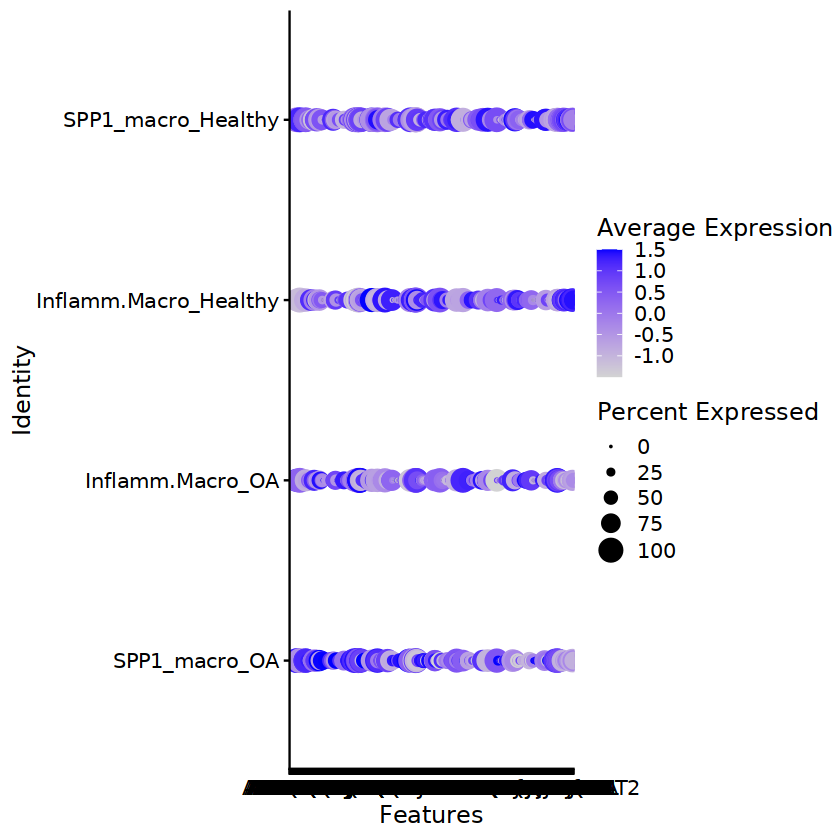

In [43]:
features_oi = union(lr_network$ligand, lr_network$receptor) %>% union(ligand_activities_targets$target) %>% setdiff(NA)
# 上一步得到1597个feature
dotplot = suppressWarnings(Seurat::DotPlot(seurat_obj %>% subset(idents = niches %>% unlist() %>% unique()), features = features_oi, assay = assay_oi))
exprs_tbl = dotplot$data %>% as_tibble()
exprs_tbl = exprs_tbl %>% rename(celltype = id, gene = features.plot, expression = avg.exp, expression_scaled = avg.exp.scaled, fraction = pct.exp) %>%
    mutate(fraction = fraction/100) %>% as_tibble() %>% select(celltype, gene, expression, expression_scaled, fraction) %>% distinct() %>% arrange(gene) %>% mutate(gene = as.character(gene))
  
exprs_tbl_ligand = exprs_tbl %>% filter(gene %in% lr_network$ligand) %>% rename(sender = celltype, ligand = gene, ligand_expression = expression, ligand_expression_scaled = expression_scaled, ligand_fraction = fraction) 
exprs_tbl_receptor = exprs_tbl %>% filter(gene %in% lr_network$receptor) %>% rename(receiver = celltype, receptor = gene, receptor_expression = expression, receptor_expression_scaled = expression_scaled, receptor_fraction = fraction)
exprs_tbl_target = exprs_tbl %>% filter(gene %in% ligand_activities_targets$target) %>% rename(receiver = celltype, target = gene, target_expression = expression, target_expression_scaled = expression_scaled, target_fraction = fraction)
dotplot

In [44]:
exprs_tbl_ligand = exprs_tbl_ligand %>%  mutate(scaled_ligand_expression_scaled = scale_quantile_adapted(ligand_expression_scaled)) %>% mutate(ligand_fraction_adapted = ligand_fraction) %>% mutate_cond(ligand_fraction >= expression_pct, ligand_fraction_adapted = expression_pct)  %>% mutate(scaled_ligand_fraction_adapted = scale_quantile_adapted(ligand_fraction_adapted))

exprs_tbl_receptor = exprs_tbl_receptor %>% mutate(scaled_receptor_expression_scaled = scale_quantile_adapted(receptor_expression_scaled))  %>% mutate(receptor_fraction_adapted = receptor_fraction) %>% mutate_cond(receptor_fraction >= expression_pct, receptor_fraction_adapted = expression_pct)  %>% mutate(scaled_receptor_fraction_adapted = scale_quantile_adapted(receptor_fraction_adapted))

In [45]:
exprs_sender_receiver = lr_network %>% 
  inner_join(exprs_tbl_ligand, by = c("ligand")) %>% 
  inner_join(exprs_tbl_receptor, by = c("receptor")) %>% inner_join(DE_sender_receiver %>% distinct(niche, sender, receiver))
  
ligand_scaled_receptor_expression_fraction_df = exprs_sender_receiver %>% group_by(ligand, receiver) %>% mutate(rank_receptor_expression = dense_rank(receptor_expression), rank_receptor_fraction  = dense_rank(receptor_fraction)) %>% mutate(ligand_scaled_receptor_expression_fraction = 0.5*( (rank_receptor_fraction / max(rank_receptor_fraction)) + ((rank_receptor_expression / max(rank_receptor_expression))) ) )  %>% distinct(ligand, receptor, receiver, ligand_scaled_receptor_expression_fraction, bonafide) %>% distinct() %>% ungroup() 
View(ligand_scaled_receptor_expression_fraction_df)

Warning message in inner_join(., exprs_tbl_ligand, by = c("ligand")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 1 of `x` matches multiple rows in `y`.
i Row 1 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."
Warning message in inner_join(., exprs_tbl_receptor, by = c("receptor")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 1 of `x` matches multiple rows in `y`.
i Row 553 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."
Joining with `by = join_by(sender, receiver)`


ligand,receptor,receiver,ligand_scaled_receptor_expression_fraction,bonafide
<chr>,<chr>,<chr>,<dbl>,<lgl>
A2M,MMP2,Inflamm.Macro_OA,0.3333333,TRUE
A2M,MMP2,Inflamm.Macro_Healthy,0.6666667,TRUE
A2M,MMP9,Inflamm.Macro_OA,0.6666667,TRUE
A2M,MMP9,Inflamm.Macro_Healthy,0.3333333,TRUE
A2M,LRP1,Inflamm.Macro_OA,1.0000000,TRUE
A2M,LRP1,Inflamm.Macro_Healthy,1.0000000,TRUE
ABCA1,APOA1,Inflamm.Macro_OA,1.0000000,TRUE
ABCA1,APOA1,Inflamm.Macro_Healthy,1.0000000,TRUE
ABCA1,MEGF10,Inflamm.Macro_OA,0.5000000,TRUE


In [46]:
prioritizing_weights = c("scaled_ligand_score" = 5,
                         "scaled_ligand_expression_scaled" = 1,
                         "ligand_fraction" = 1,
                         "scaled_ligand_score_spatial" = 2, 
                         "scaled_receptor_score" = 0.5,
                         "scaled_receptor_expression_scaled" = 0.5,
                          "receptor_fraction" = 1, 
                         "ligand_scaled_receptor_expression_fraction" = 1,
                         "scaled_receptor_score_spatial" = 0,
                         "scaled_activity" = 0,
                         "scaled_activity_normalized" = 1,
                         "bona_fide" = 1)

In [47]:
output = list(DE_sender_receiver = DE_sender_receiver, ligand_scaled_receptor_expression_fraction_df = ligand_scaled_receptor_expression_fraction_df, sender_spatial_DE_processed = sender_spatial_DE_processed, receiver_spatial_DE_processed = receiver_spatial_DE_processed,
         ligand_activities_targets = ligand_activities_targets, DE_receiver_processed_targets = DE_receiver_processed_targets, exprs_tbl_ligand = exprs_tbl_ligand,  exprs_tbl_receptor = exprs_tbl_receptor, exprs_tbl_target = exprs_tbl_target)
prioritization_tables = get_prioritization_tables(output, prioritizing_weights)

In [48]:
##查看list基本结构
prioritization_tables$prioritization_tbl_ligand_receptor %>% filter(receiver == niches[[1]]$receiver) %>% head(10)

prioritization_tables$prioritization_tbl_ligand_target %>% filter(receiver == niches[[1]]$receiver) %>% head(10)

prioritization_tables$prioritization_tbl_ligand_receptor %>% filter(receiver == niches[[2]]$receiver) %>% head(10)

prioritization_tables$prioritization_tbl_ligand_target %>% filter(receiver == niches[[2]]$receiver) %>% head(10)

niche,receiver,sender,ligand_receptor,ligand,receptor,ligand_score,ligand_significant,ligand_present,ligand_expression,...,scaled_receptor_score,scaled_receptor_expression_scaled,scaled_avg_score_ligand_receptor,scaled_ligand_score_spatial,scaled_receptor_score_spatial,scaled_ligand_fraction_adapted,scaled_receptor_fraction_adapted,scaled_activity,scaled_activity_normalized,prioritization_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,0.9707377,1,1,16.43618,...,0.5577603,0.9058901,0.9225043,0.001,0.001,1.001,1.001,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--CD44,COL1A1,CD44,0.9463895,1,1,17.02995,...,0.5577603,0.9058901,0.9129583,0.001,0.001,1.001,1.001,0.02640408,0.02826957,0.7834986
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL3A1--ITGB1,COL3A1,ITGB1,1.0618598,1,1,16.53320,...,0.4094788,0.1398760,0.8513416,0.001,0.001,1.001,1.001,0.01912986,0.02177558,0.7665117
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--ITGA5,COL1A1,ITGA5,0.9463895,1,1,17.02995,...,0.5143278,0.7508756,0.8816502,0.001,0.001,1.001,1.001,0.02640408,0.02826957,0.7579681
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--CD93,COL1A1,CD93,0.9463895,1,1,17.02995,...,0.3566634,0.5572299,0.7679983,0.001,0.001,1.001,1.001,0.02640408,0.02826957,0.7490841
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD93,COL1A2,CD93,0.9707377,1,1,16.43618,...,0.3566634,0.5572299,0.7775443,0.001,0.001,1.001,1.001,0.01910035,0.02174923,0.7479396
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--ITGB1,COL1A2,ITGB1,0.9707377,1,1,16.43618,...,0.4094788,0.1398760,0.8156161,0.001,0.001,1.001,1.001,0.01910035,0.02174923,0.7410839
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--ITGB1,COL1A1,ITGB1,0.9463895,1,1,17.02995,...,0.4094788,0.1398760,0.8060701,0.001,0.001,1.001,1.001,0.02640408,0.02826957,0.7396490
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,CLU--TREM2,CLU,TREM2,0.8271940,1,1,8.48135,...,0.5954926,0.2776906,0.8934256,0.001,0.001,1.001,1.001,0.02020917,0.02273912,0.7357248


niche,receiver,sender,ligand_receptor,ligand,receptor,target,target_score,target_significant,target_present,target_expression,target_expression_scaled,target_fraction,ligand_target_weight,activity,activity_normalized,scaled_activity,scaled_activity_normalized,prioritization_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,CCL2,0.2812321,1,1,2.7704808,0.20587891,0.2429907,0.012438454,0.01011858,-0.10388390,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,CLU,0.3401643,1,1,1.7239143,-0.32499183,0.4672897,0.009233891,0.01011858,-0.10388390,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,COL1A2,0.3185661,1,1,0.6539696,-0.45684363,0.2336449,0.009910901,0.01011858,-0.10388390,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,FN1,0.4838809,1,1,8.5495468,-0.08212924,0.6682243,0.010882475,0.01011858,-0.10388390,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,S100A10,0.2774912,1,1,32.1787001,0.81021288,0.9766355,0.009877706,0.01011858,-0.10388390,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A2--CD44,COL1A2,CD44,TAGLN2,0.3676025,1,1,6.7190810,0.46679623,0.8177570,0.009415021,0.01011858,-0.10388390,0.01910035,0.02174923,0.7875128
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--CD44,COL1A1,CD44,A2M,0.2926818,1,1,1.5905158,-0.52596756,0.3948598,0.009253024,0.01374752,-0.03769511,0.02640408,0.02826957,0.7834986
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--CD44,COL1A1,CD44,CCL2,0.2812321,1,1,2.7704808,0.20587891,0.2429907,0.011864794,0.01374752,-0.03769511,0.02640408,0.02826957,0.7834986
neiche_OA7,Inflamm.Macro_OA,SPP1_macro_OA,COL1A1--CD44,COL1A1,CD44,CD9,0.2922083,1,1,2.8807799,-0.53818910,0.5327103,0.025342451,0.01374752,-0.03769511,0.02640408,0.02826957,0.7834986


niche,receiver,sender,ligand_receptor,ligand,receptor,ligand_score,ligand_significant,ligand_present,ligand_expression,...,scaled_receptor_score,scaled_receptor_expression_scaled,scaled_avg_score_ligand_receptor,scaled_ligand_score_spatial,scaled_receptor_score_spatial,scaled_ligand_fraction_adapted,scaled_receptor_fraction_adapted,scaled_activity,scaled_activity_normalized,prioritization_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,1.1097590,1,1,17.76233,...,0.5792774,0.4661879,0.9925198,0.001,0.001,1.001,1.001,0.03189520,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,SPP1--ITGA4,SPP1,ITGA4,0.7926973,1,1,106.31445,...,0.6428046,0.9845607,0.9140054,0.001,0.001,1.001,1.001,0.02535535,0.01959066,0.7438745
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,SPP1--CD44,SPP1,CD44,0.7926973,1,1,106.31445,...,0.4442397,0.4553367,0.7708706,0.001,0.001,1.001,1.001,0.02535535,0.01959066,0.7302167
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--CD68,S100A9,CD68,1.1097590,1,1,17.76233,...,0.5910417,0.3008883,1.0010000,0.001,0.001,1.001,1.001,0.03189520,0.02618208,0.7282783
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,C1QA--CD93,C1QA,CD93,0.6525884,1,1,16.49621,...,0.6453366,0.9497559,0.8608993,0.001,0.001,1.001,1.001,0.03061029,0.02488705,0.7278400
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,SPP1--ITGB1,SPP1,ITGB1,0.7926973,1,1,106.31445,...,0.5925212,0.3531049,0.8777588,0.001,0.001,1.001,1.001,0.02535535,0.01959066,0.7238021
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--TLR4,S100A9,TLR4,1.1097590,1,1,17.76233,...,0.5749586,0.6938984,0.9894066,0.001,0.001,1.001,1.001,0.03189520,0.02618208,0.7162058
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,C1QB--LRP1,C1QB,LRP1,0.6675847,1,1,16.94975,...,0.6613124,0.4590261,0.8782949,0.001,0.001,1.001,1.001,0.03020287,0.02447641,0.7150573
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,SPP1--ITGA5,SPP1,ITGA5,0.7926973,1,1,106.31445,...,0.4876722,0.5312318,0.8021788,0.001,0.001,1.001,1.001,0.02535535,0.01959066,0.7101886


niche,receiver,sender,ligand_receptor,ligand,receptor,target,target_score,target_significant,target_present,target_expression,target_expression_scaled,target_fraction,ligand_target_weight,activity,activity_normalized,scaled_activity,scaled_activity_normalized,prioritization_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,CITED2,0.3185890,1,1,1.714061,0.98058783,0.4101825,0.01586587,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,DDIT4,0.2716435,1,1,1.821026,1.30052596,0.4716619,0.01838751,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,DUSP6,0.2919322,1,1,3.310181,1.35803576,0.5965418,0.01562486,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,EGR1,0.3121953,1,1,6.799095,1.08777952,0.6330451,0.02588572,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,HMGB2,0.4273080,1,1,1.756471,-0.58198313,0.4822286,0.01351724,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,JUN,0.2612935,1,1,17.793225,1.07958934,0.8338136,0.02220809,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,MAF,0.3101227,1,1,1.280870,0.03084442,0.3688761,0.01312324,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,S100A8,1.1410911,1,1,46.523933,1.48481277,0.6455331,0.07093487,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645
neiche_N2,Inflamm.Macro_Healthy,SPP1_macro_Healthy,S100A9--ITGB2,S100A9,ITGB2,SOD2,0.2680059,1,1,18.921332,1.38186923,0.8472622,0.01564183,0.01647584,-0.05888543,0.0318952,0.02618208,0.7485645


In [49]:
top_ligand_niche_df = prioritization_tables$prioritization_tbl_ligand_receptor %>% select(niche, sender, receiver, ligand, receptor, prioritization_score) %>% group_by(ligand) %>% top_n(1, prioritization_score) %>% ungroup() %>% select(ligand, receptor, niche) %>% rename(top_niche = niche)
top_ligand_receptor_niche_df = prioritization_tables$prioritization_tbl_ligand_receptor %>% select(niche, sender, receiver, ligand, receptor, prioritization_score) %>% group_by(ligand, receptor) %>% top_n(1, prioritization_score) %>% ungroup() %>% select(ligand, receptor, niche) %>% rename(top_niche = niche)

ligand_prioritized_tbl_oi = prioritization_tables$prioritization_tbl_ligand_receptor %>% select(niche, sender, receiver, ligand, prioritization_score) %>% group_by(ligand, niche) %>% top_n(1, prioritization_score) %>% ungroup() %>% distinct() %>% inner_join(top_ligand_niche_df) %>% filter(niche == top_niche) %>% group_by(niche) %>% top_n(50, prioritization_score) %>% ungroup() # get the top50 ligands per niche
table(ligand_prioritized_tbl_oi$receiver)
# Malignant_High  Malignant_Low 
#             50             50 
View(ligand_prioritized_tbl_oi)

Joining with `by = join_by(ligand)`



Inflamm.Macro_Healthy      Inflamm.Macro_OA 
                   50                    50 

niche,sender,receiver,ligand,prioritization_score,receptor,top_niche
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
neiche_OA7,SPP1_macro_OA,Inflamm.Macro_OA,COL1A2,0.7875128,CD44,neiche_OA7
neiche_OA7,SPP1_macro_OA,Inflamm.Macro_OA,COL1A1,0.7834986,CD44,neiche_OA7
neiche_OA7,SPP1_macro_OA,Inflamm.Macro_OA,COL3A1,0.7665117,ITGB1,neiche_OA7
neiche_N2,SPP1_macro_Healthy,Inflamm.Macro_Healthy,S100A9,0.7485645,ITGB2,neiche_N2
neiche_N2,SPP1_macro_Healthy,Inflamm.Macro_Healthy,SPP1,0.7438745,ITGA4,neiche_N2
neiche_OA7,SPP1_macro_OA,Inflamm.Macro_OA,CLU,0.7357248,TREM2,neiche_OA7
neiche_N2,SPP1_macro_Healthy,Inflamm.Macro_Healthy,C1QA,0.7278400,CD93,neiche_N2
neiche_OA7,SPP1_macro_OA,Inflamm.Macro_OA,LUM,0.7166924,ITGB1,neiche_OA7
neiche_OA7,SPP1_macro_OA,Inflamm.Macro_OA,BGN,0.7150601,TLR2,neiche_OA7


In [51]:
receiver_oi = "Inflamm.Macro_OA" 

filtered_ligands = ligand_prioritized_tbl_oi %>% filter(receiver == receiver_oi) %>% pull(ligand) %>% unique()

prioritized_tbl_oi = prioritization_tables$prioritization_tbl_ligand_receptor %>% filter(ligand %in% filtered_ligands) %>%
select(niche, sender, receiver, ligand,  receptor, ligand_receptor, prioritization_score) %>% distinct() %>% 
inner_join(top_ligand_receptor_niche_df) %>% group_by(ligand) %>% filter(receiver == receiver_oi) %>%
top_n(2, prioritization_score) %>% ungroup() 

Joining with `by = join_by(ligand, receptor)`


In [52]:
lfc_plot = make_ligand_receptor_lfc_plot(receiver_oi, prioritized_tbl_oi, prioritization_tables$prioritization_tbl_ligand_receptor, plot_legend = FALSE, heights = NULL, widths = NULL)


Joining with `by = join_by(ligand_receptor, prioritization_score)`
Joining with `by = join_by(ligand)`
Joining with `by = join_by(prioritization_score, niche, sender, ligand)`
Joining with `by = join_by(ligand_receptor, ligand, receptor)`


In [53]:
options(repr.plot.width = 12,repr.plot.height = 16)

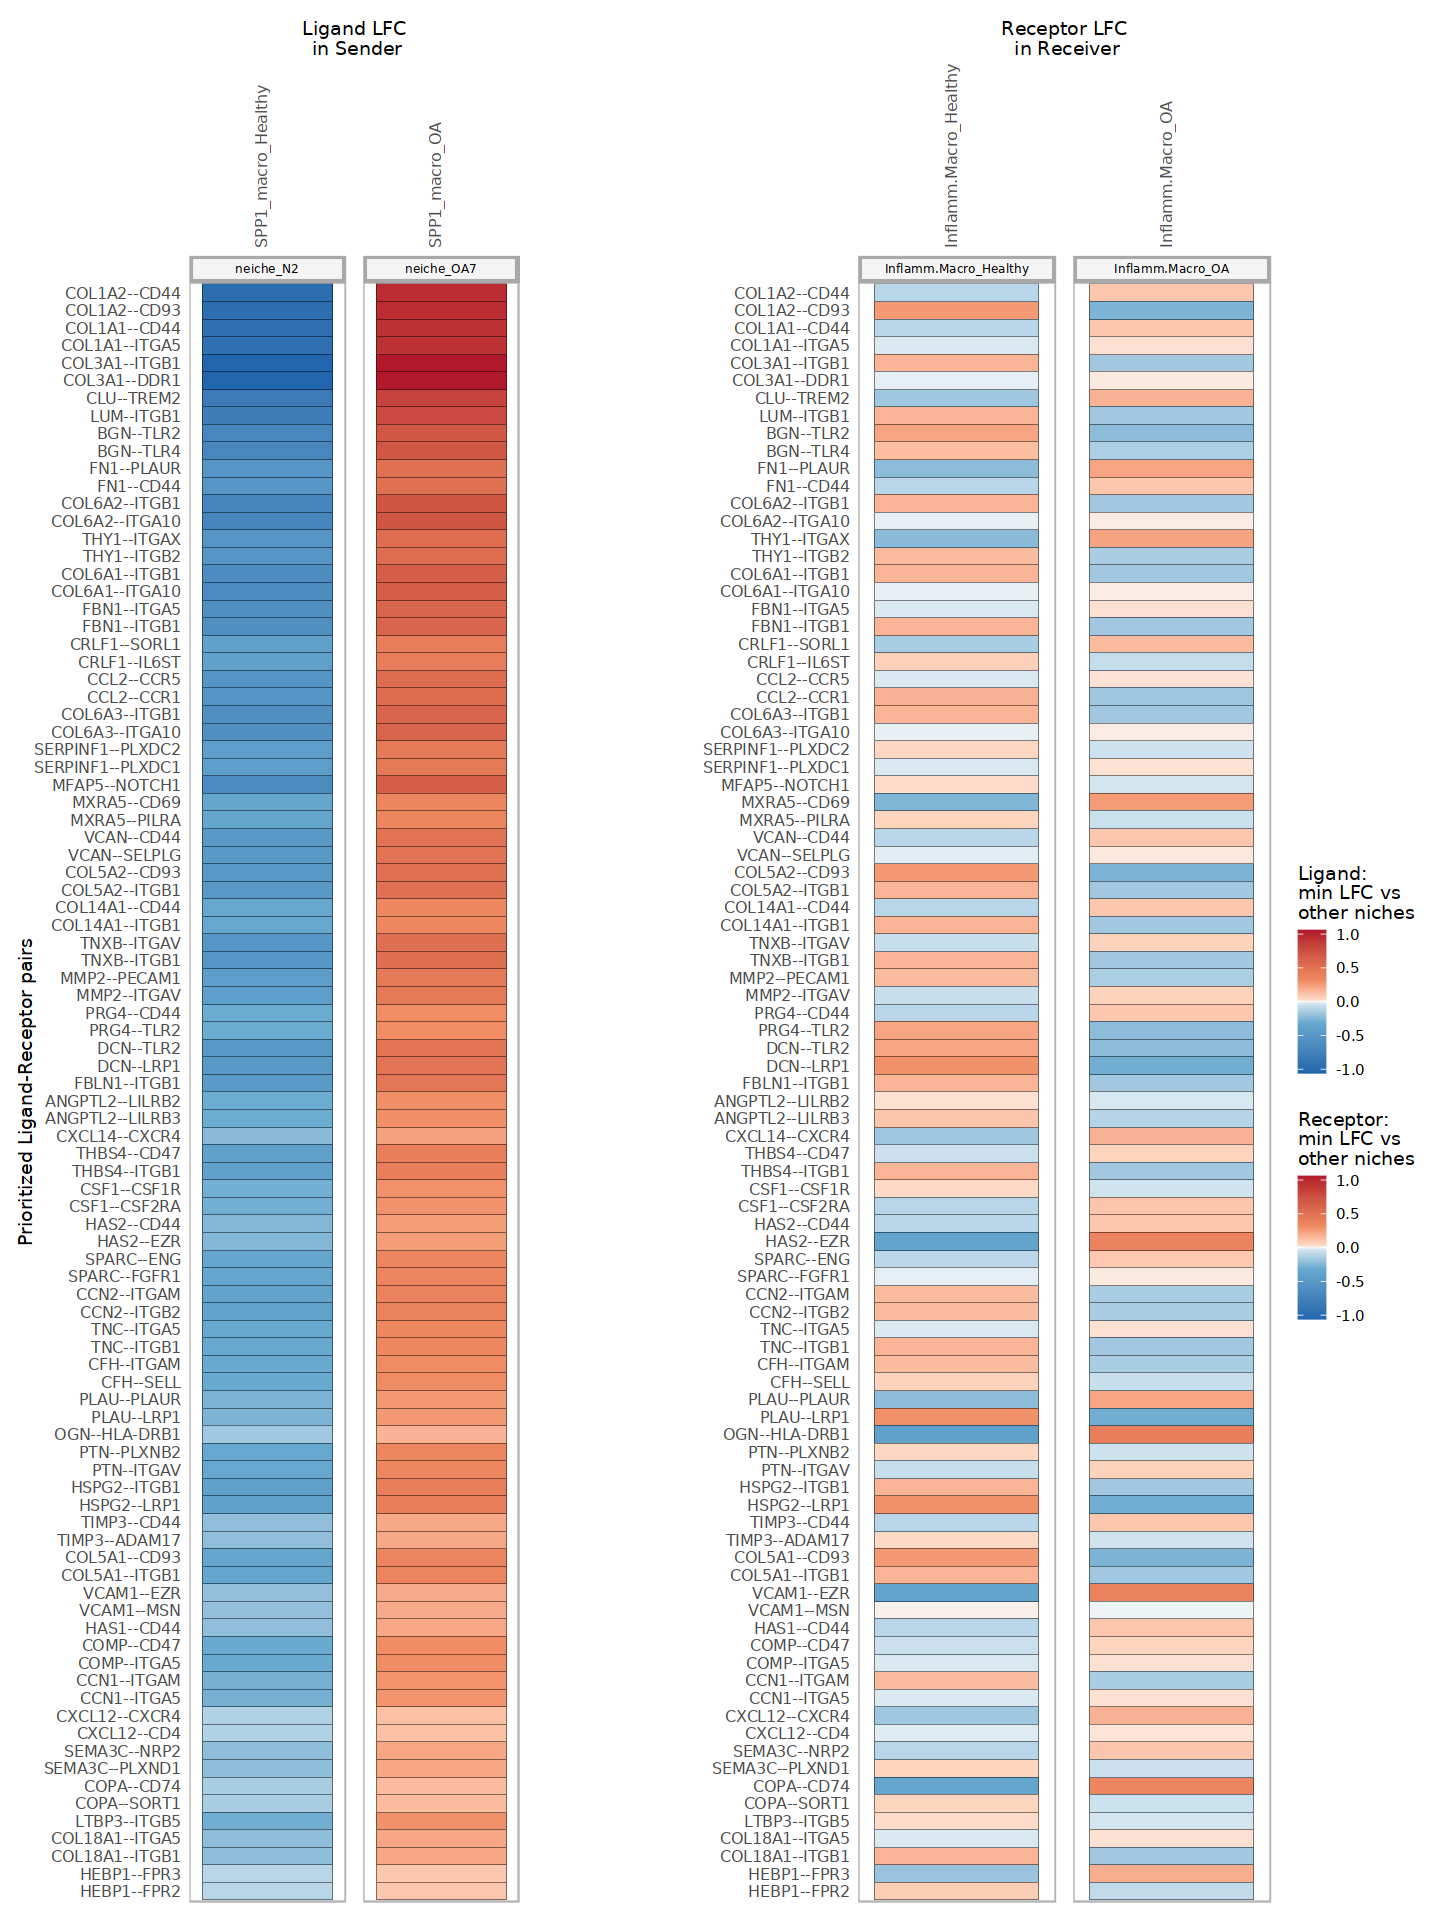

In [54]:
lfc_plot

In [55]:
options(repr.plot.width = 8,repr.plot.height = 8)

Joining with `by = join_by(ligand, ligand_score)`
Joining with `by = join_by(ligand)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(target)`
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


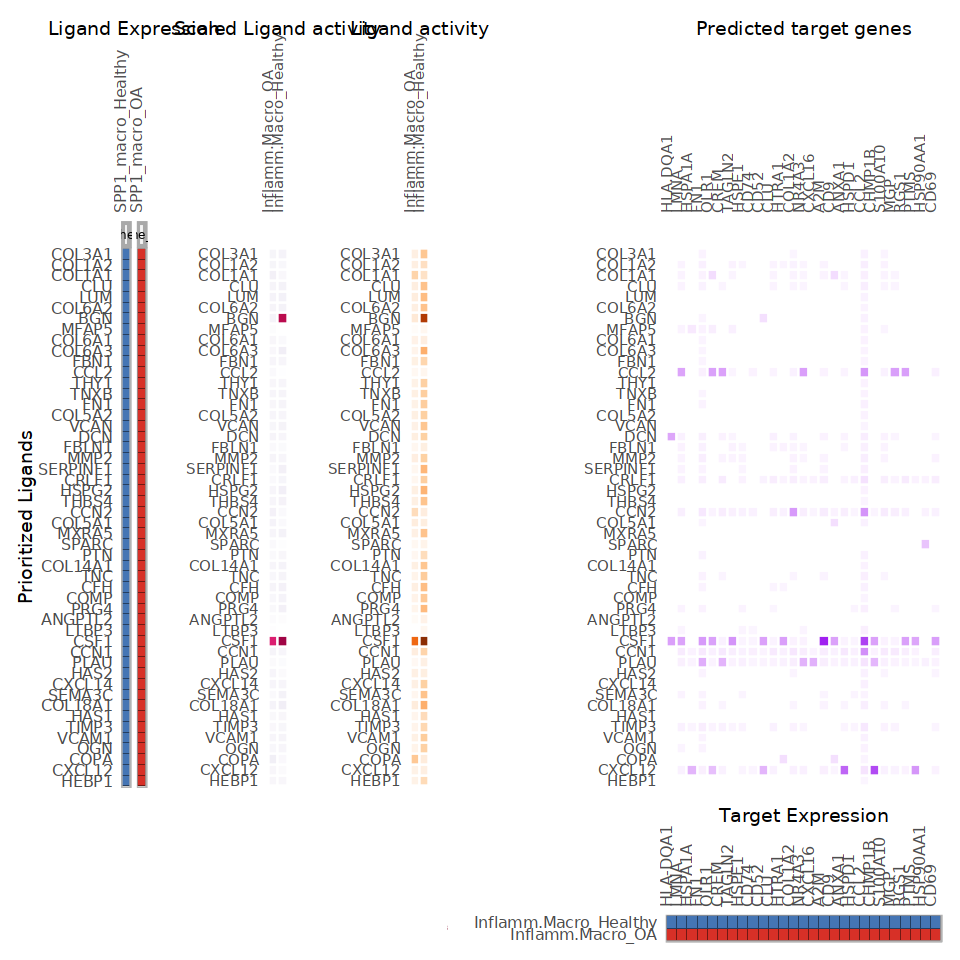

In [56]:
exprs_activity_target_plot = make_ligand_activity_target_exprs_plot(receiver_oi, prioritized_tbl_oi,  
                                                                    prioritization_tables$prioritization_tbl_ligand_receptor,  
                                                                    prioritization_tables$prioritization_tbl_ligand_target, output$exprs_tbl_ligand,  output$exprs_tbl_target, lfc_cutoff, ligand_target_matrix, plot_legend = FALSE, heights = NULL, widths = NULL)
exprs_activity_target_plot$combined_plot

Joining with `by = join_by(ligand, receptor)`
Joining with `by = join_by(ligand, ligand_score)`
Joining with `by = join_by(ligand)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(target)`
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


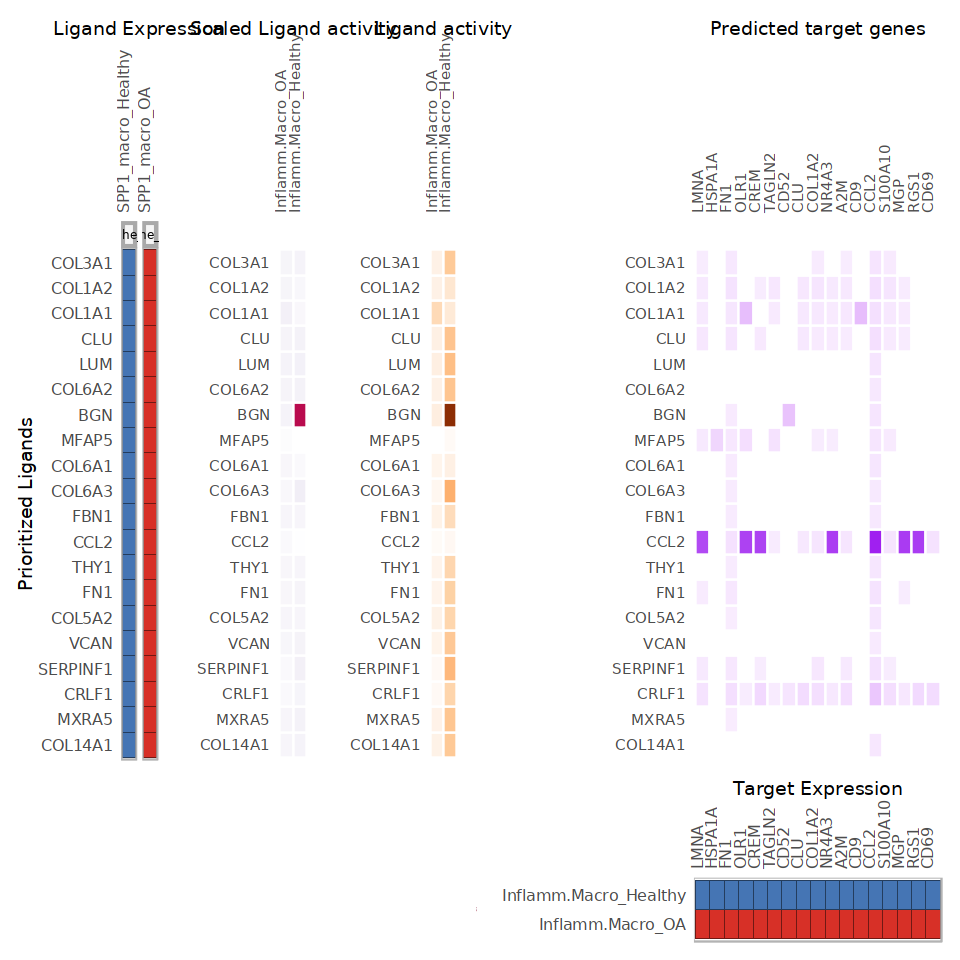

In [57]:
filtered_ligands = ligand_prioritized_tbl_oi %>% filter(receiver == receiver_oi) %>% top_n(20, prioritization_score) %>% pull(ligand) %>% unique()

prioritized_tbl_oi = prioritization_tables$prioritization_tbl_ligand_receptor %>% filter(ligand %in% filtered_ligands) %>% select(niche, sender, receiver, ligand,  receptor, ligand_receptor, prioritization_score) %>% distinct() %>% inner_join(top_ligand_receptor_niche_df) %>% group_by(ligand) %>% filter(receiver == receiver_oi) %>% top_n(2, prioritization_score) %>% ungroup() 

exprs_activity_target_plot = make_ligand_activity_target_exprs_plot(receiver_oi, prioritized_tbl_oi,  prioritization_tables$prioritization_tbl_ligand_receptor,  prioritization_tables$prioritization_tbl_ligand_target, output$exprs_tbl_ligand,  output$exprs_tbl_target, lfc_cutoff, ligand_target_matrix, plot_legend = FALSE, heights = NULL, widths = NULL)
exprs_activity_target_plot$combined_plot

In [58]:
library(RColorBrewer)

Joining with `by = join_by(ligand, receptor)`
Warning message in brewer.pal(n = prioritized_tbl_oi$sender %>% unique() %>% sort() %>% :
"minimal value for n is 3, returning requested palette with 3 different levels
"
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`
Joining with `by = join_by(receptor)`


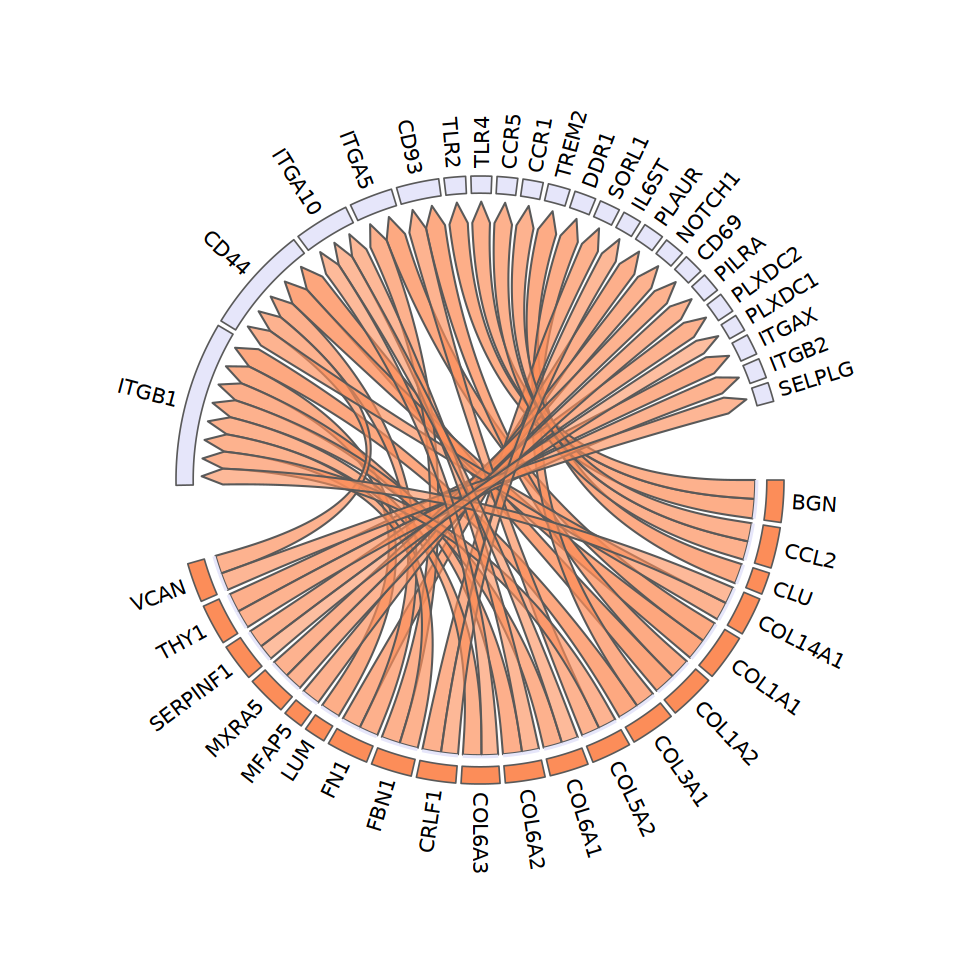

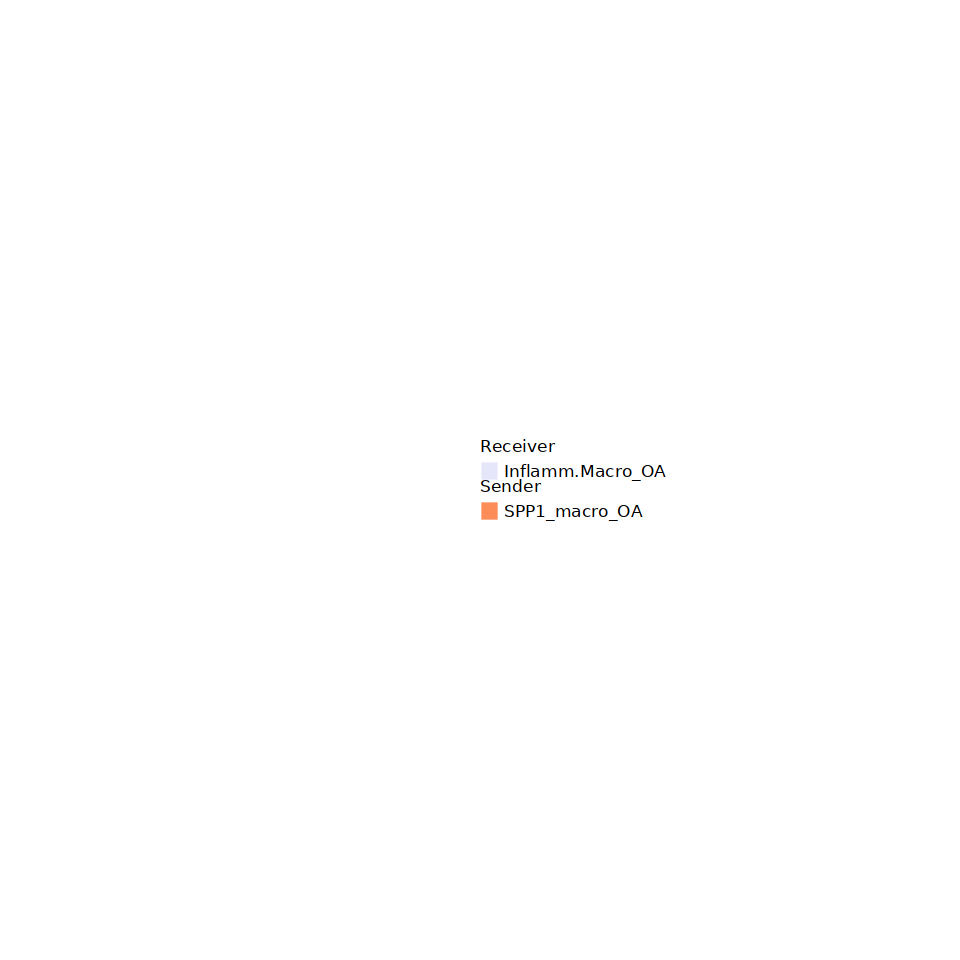

In [59]:
filtered_ligands = ligand_prioritized_tbl_oi %>% filter(receiver == receiver_oi) %>% top_n(20, prioritization_score) %>% pull(ligand) %>% unique()

prioritized_tbl_oi = prioritization_tables$prioritization_tbl_ligand_receptor %>% filter(ligand %in% filtered_ligands) %>% select(niche, sender, receiver, ligand,  receptor, ligand_receptor, prioritization_score) %>% distinct() %>% inner_join(top_ligand_receptor_niche_df) %>% group_by(ligand) %>% filter(receiver == receiver_oi) %>% top_n(2, prioritization_score) %>% ungroup() 

colors_sender = brewer.pal(n = prioritized_tbl_oi$sender %>% unique() %>% sort() %>% length(), name = 'Spectral') %>% magrittr::set_names(prioritized_tbl_oi$sender %>% unique() %>% sort())
colors_receiver = c("lavender")  %>% magrittr::set_names(prioritized_tbl_oi$receiver %>% unique() %>% sort())

circos_output = make_circos_lr(prioritized_tbl_oi, colors_sender, colors_receiver)

In [21]:
Idents(seurat_obj) <- 'seurat_clusters'
receiver = "3"
expressed_genes_receiver = get_expressed_genes(receiver, seurat_obj, pct = 0.10)
background_expressed_genes = expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
## sender
sender_celltypes = c("7")
list_expressed_genes_sender = sender_celltypes %>% unique() %>% lapply(get_expressed_genes, seuratObj, 0.10) # lapply to get the expressed genes of every sender cell type separately here
expressed_genes_sender = list_expressed_genes_sender %>% unlist() %>% unique()

Warning message in get_expressed_genes(receiver, seurat_obj, pct = 0.1):
"Seurat object is result from the Seurat integration workflow. The expressed genes are now defined based on the integrated slot. You can change this via the assay_oi parameter of the get_expressed_genes() functions. Recommended assays: RNA or SCT"
Warning message in FUN(X[[i]], ...):
"Seurat object is result from the Seurat integration workflow. The expressed genes are now defined based on the integrated slot. You can change this via the assay_oi parameter of the get_expressed_genes() functions. Recommended assays: RNA or SCT"


### https://lishensuo.github.io/posts/bioinfo/029%E5%8D%95%E7%BB%86%E8%83%9E%E5%88%86%E6%9E%90%E5%B7%A5%E5%85%B7--nichenet%E7%BB%86%E8%83%9E%E9%80%9A%E8%AE%AF%E5%88%86%E6%9E%90/

In [22]:
table(seurat_obj$orig.ident)


  N2  OA7 
1308 2982 

In [19]:
assay_oi = 'intergrated'

In [20]:
nichenet_output =  nichenet_seuratobj_aggregate(
  seurat_obj = seuratObj, # Seurat对象，其active.ident需设置为细胞类型
  expression_pct = 0.10,  # 界定细胞类型是否表达配/受体的比例阈值，默认为0.1
  #organism = "human", # 交代物种信息，默认为人类 c("human","mouse")
  #Group
  condition_colname = "orig.ident",   # 交代分组的meta名
  condition_oi = "OA7", condition_reference = "N2", # 交代实验组与对照组名 
  # receiver
    assay_oi = assay_oi,
  receiver = "3",  # 交代receiver细胞类型
  geneset = "DE", # 判断特定基因集的方法，默认使用全部差异基因(oi/ref)c("DE","up","down")
  lfc_cutoff = 0.25, # 判断差异基因的阈值
  # sender
  sender = c("7"), #设置可能的sender cell 
  top_n_targets = 100,  #每个ligand最多考虑200个target gene
  top_n_ligands = 30,   #给出最有可能的20个上游ligand
  cutoff_visualization = 0.33,  #设置可视化ligand-target scores的阈值
  # refer data
  ligand_target_matrix = ligand_target_matrix, 
  lr_network = lr_network, 
  weighted_networks = weighted_networks, 
  )


Warning message in nichenet_seuratobj_aggregate(seurat_obj = seuratObj, expression_pct = 0.1, :
"You are going to apply NicheNet on a spatial seurat object. Be sure it's ok to use NicheNet the way you are planning to do it. So this means: you should have changes in gene expression in receiver cells caused by cell-cell interactions. Note that in the case of spatial transcriptomics, you are not dealing with single cells but with 'spots' containing multiple cells of the same of different cell types."
Warning message in nichenet_seuratobj_aggregate(seurat_obj = seuratObj, expression_pct = 0.1, :
"Seurat object is result from the Seurat integration workflow. Make sure that the way of defining expressed and differentially expressed genes in this wrapper is appropriate for your integrated data."


[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"


ERROR: Error in FUN(X[[i]], ...): assay_oi should be an assay of your Seurat object


In [94]:
nichenet_output %>% names()

[1] "ligand_activities"                     
 [2] "top_ligands"                           
 [3] "top_targets"                           
 [4] "top_receptors"                         
 [5] "ligand_target_matrix"                  
 [6] "ligand_target_heatmap"                 
 [7] "ligand_target_df"                      
 [8] "ligand_expression_dotplot"             
 [9] "ligand_differential_expression_heatmap"
[10] "ligand_activity_target_heatmap"        
[11] "ligand_receptor_matrix"                
[12] "ligand_receptor_heatmap"               
[13] "ligand_receptor_df"                    
[14] "geneset_oi"                            
[15] "background_expressed_genes"

In [95]:
nichenet_output$top_ligands

[1] "COL17A1"  "TIMP2"    "APOC3"    "GJB2"     "APOA5"    "CCL14"   
 [7] "IL32"     "CXCL12"   "SEMA3C"   "GDF5"     "ANGPTL3"  "COL4A1"  
[13] "TGFB2"    "APOC2"    "CXCL1"    "EDIL3"    "ANPEP"    "TGFB1"   
[19] "APOA2"    "GCG"      "BMP6"     "SERPINA5" "CD55"     "RELN"    
[25] "CX3CL1"   "CD1D"     "OSM"      "ITIH2"    "HP"       "COL5A2"

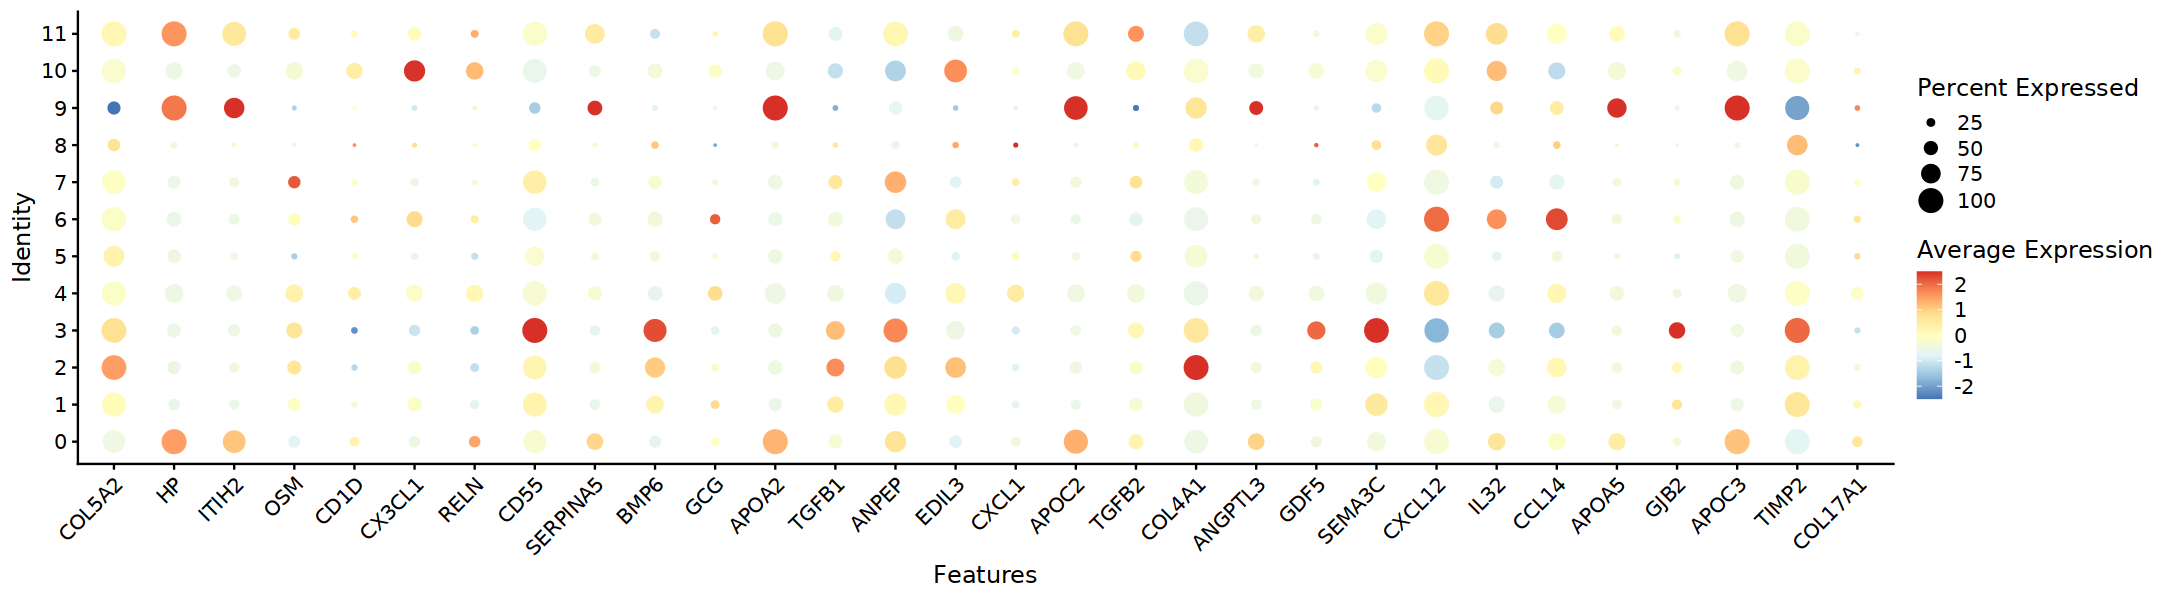

In [96]:
DotPlot(seuratObj, features = nichenet_output$top_ligands %>% rev(), cols = "RdYlBu") + RotatedAxis()

In [97]:
options(repr.plot.width =9,repr.plot.height = 14)

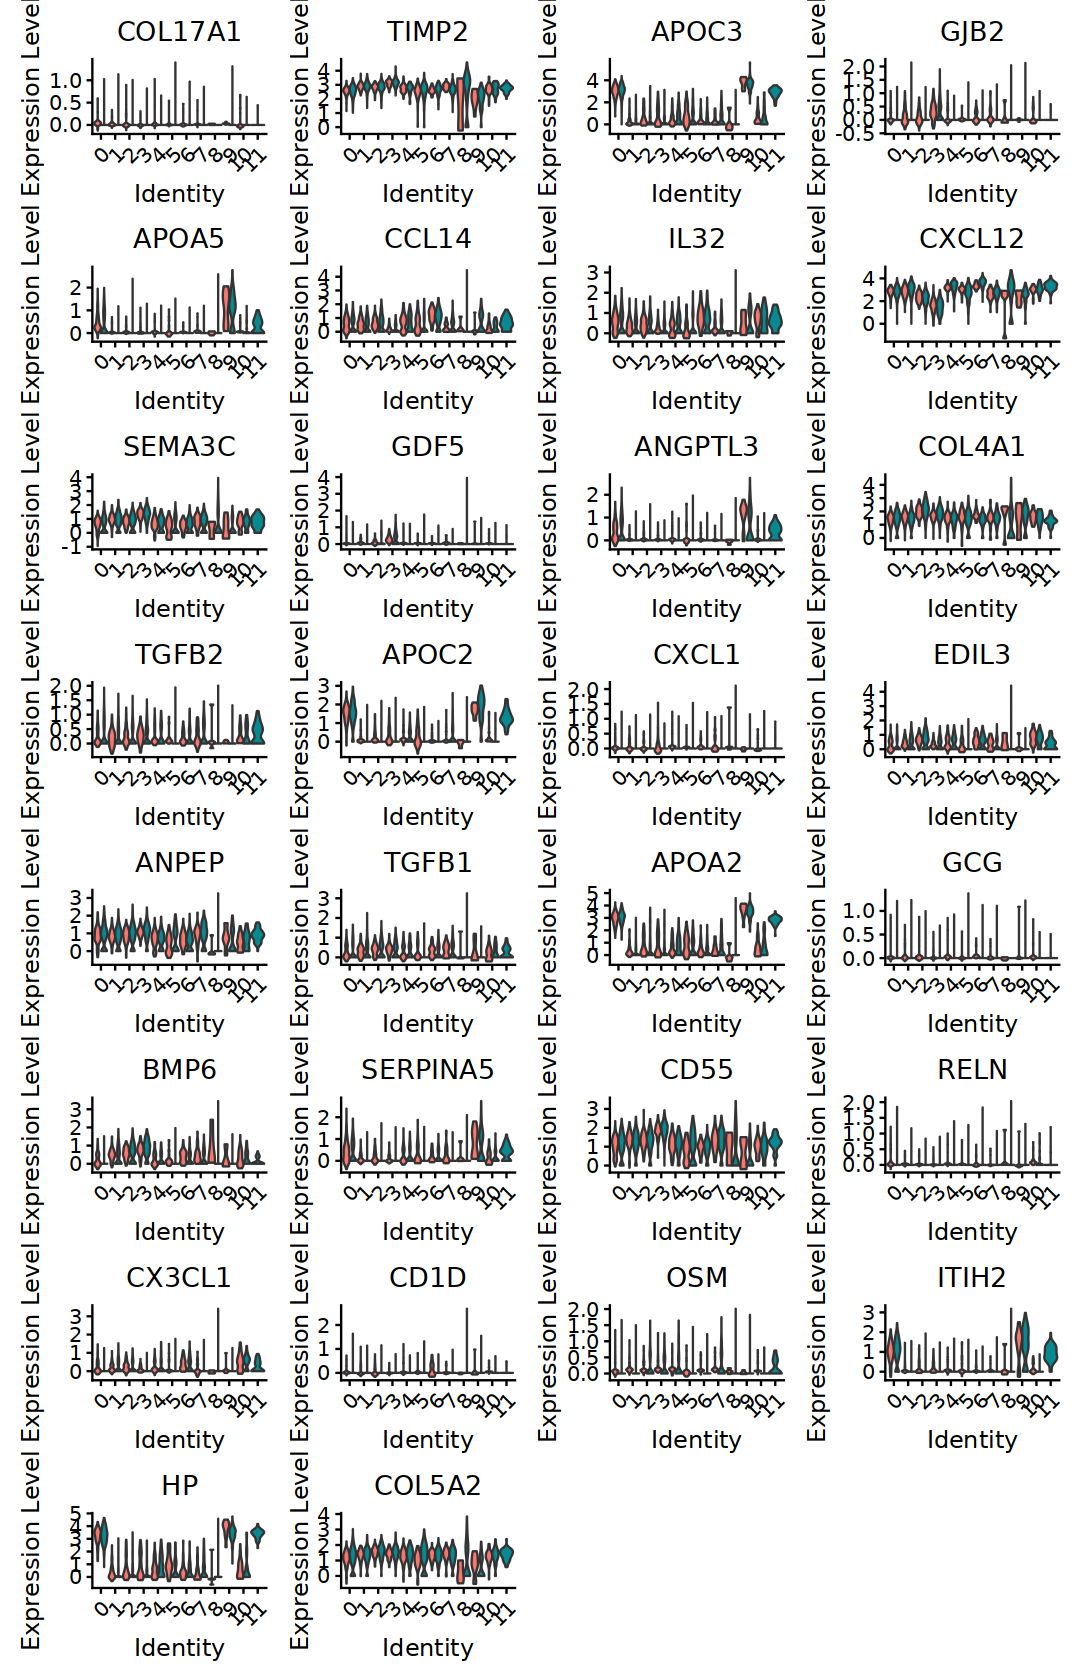

In [98]:
VlnPlot(seuratObj, features = nichenet_output$top_ligands, split.by = "orig.ident", pt.size = 0, combine = T)

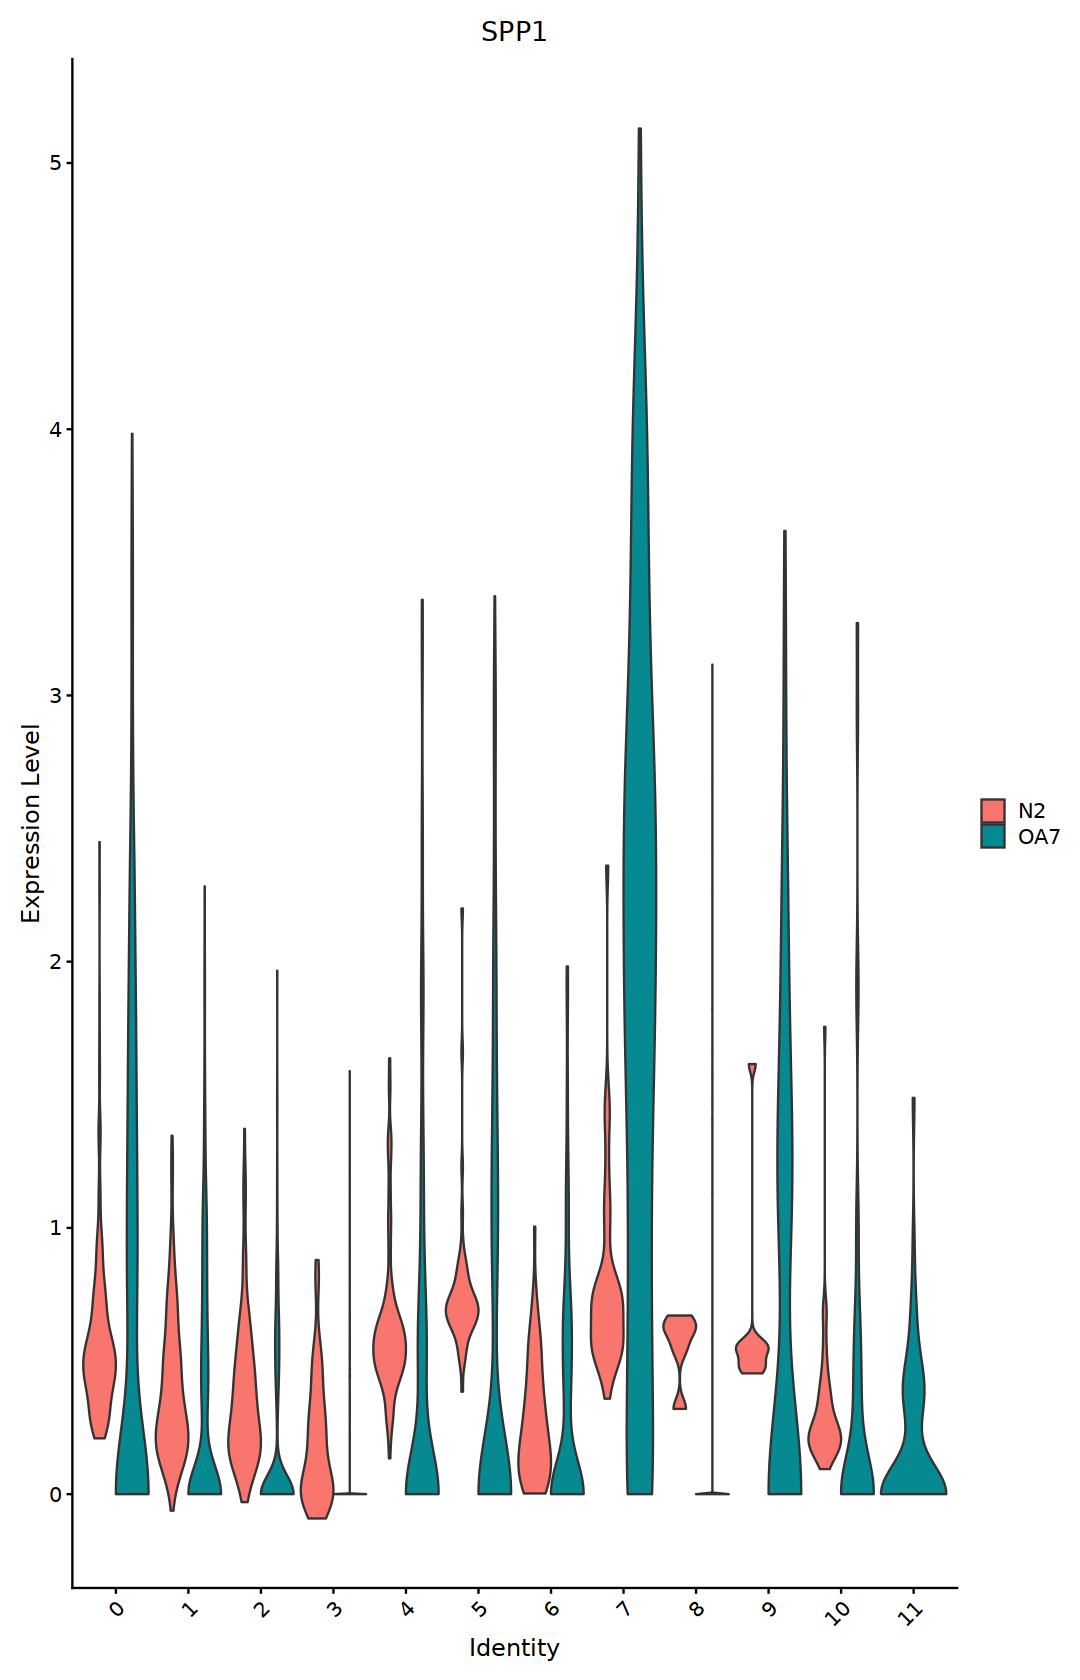

In [99]:
VlnPlot(seuratObj, features = 'SPP1', split.by = "orig.ident", pt.size = 0, combine = T)

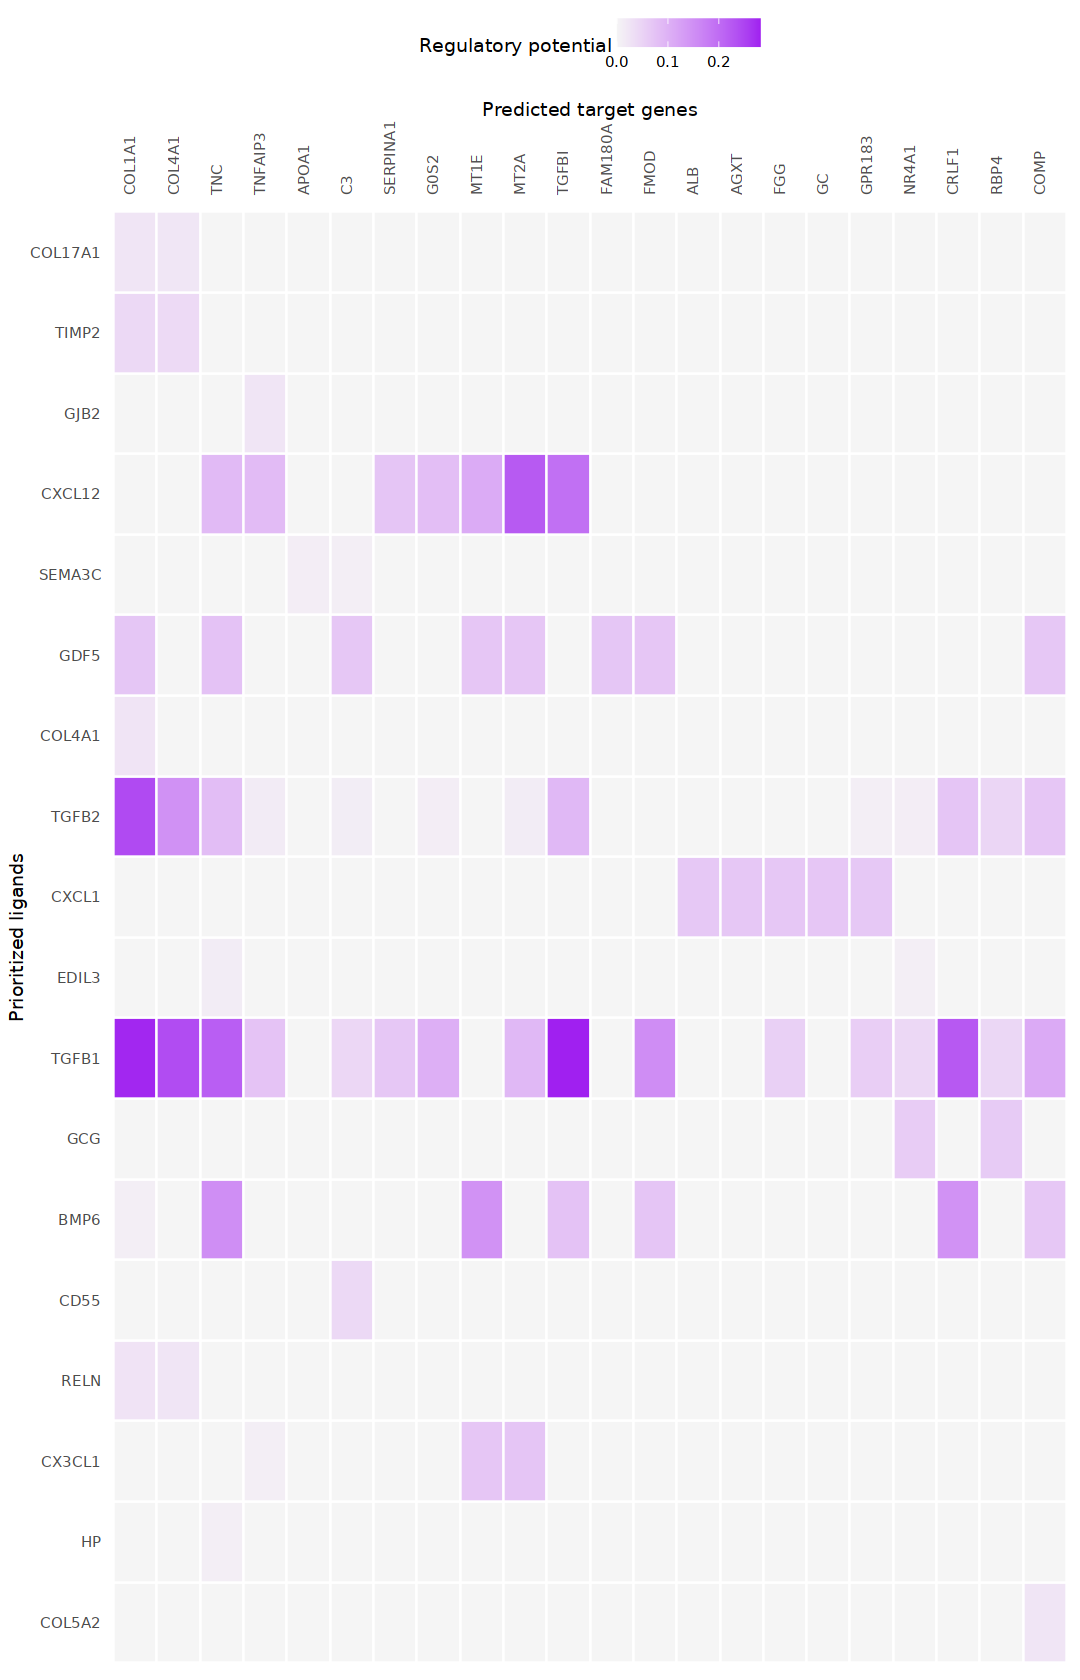

In [100]:
nichenet_output$ligand_target_heatmap

In [101]:
x = nichenet_output$top_targets

In [102]:
x

[1] "COL1A1"   "COL4A1"   "TNC"      "TNFAIP3"  "APOA1"    "C3"      
 [7] "SERPINA1" "G0S2"     "MT1E"     "MT2A"     "TGFBI"    "FAM180A" 
[13] "FMOD"     "ALB"      "AGXT"     "FGG"      "GC"       "GPR183"  
[19] "NR4A1"    "CRLF1"    "RBP4"     "COMP"

In [103]:
options(repr.plot.width = 8,repr.plot.height = 5)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


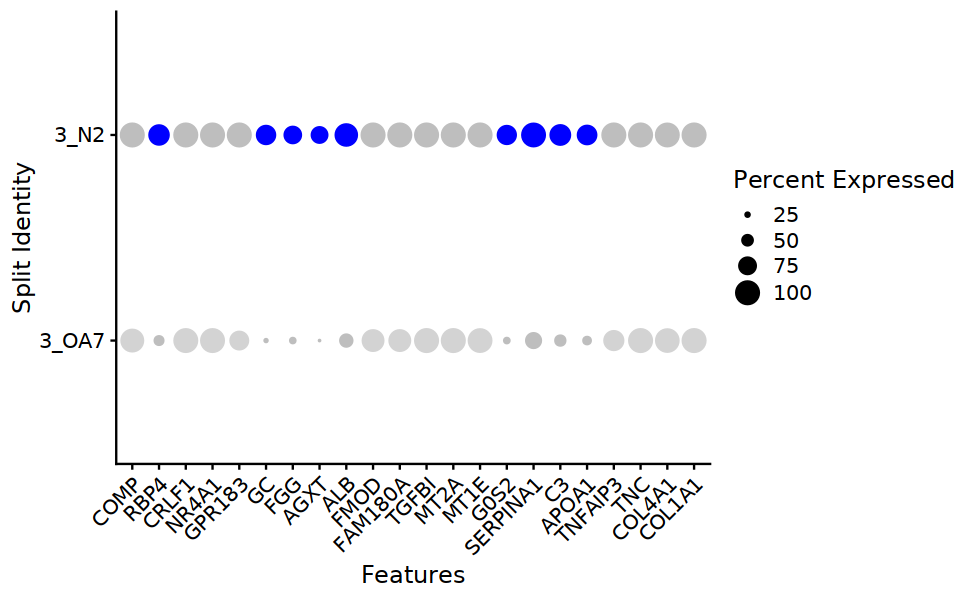

In [104]:
DotPlot(seuratObj %>% subset(idents = "3"), features = nichenet_output$top_targets %>% rev(), split.by = "orig.ident") +
RotatedAxis()

In [105]:
options(repr.plot.width = 4,repr.plot.height = 4)

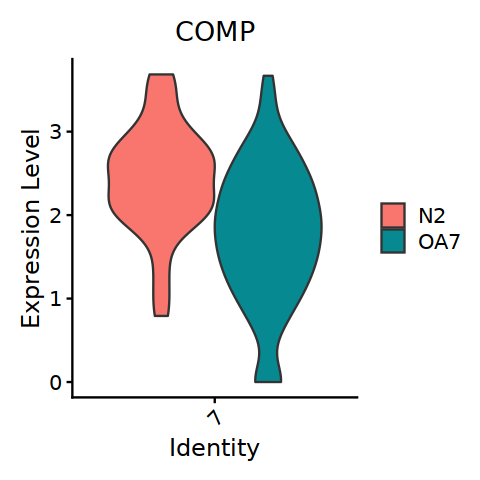

In [106]:
VlnPlot(seuratObj %>% subset(idents = "7"), features = c("COMP"),
        split.by = "orig.ident",    pt.size = 0, combine = T)

In [107]:
options(repr.plot.width = 12,repr.plot.height = 12)

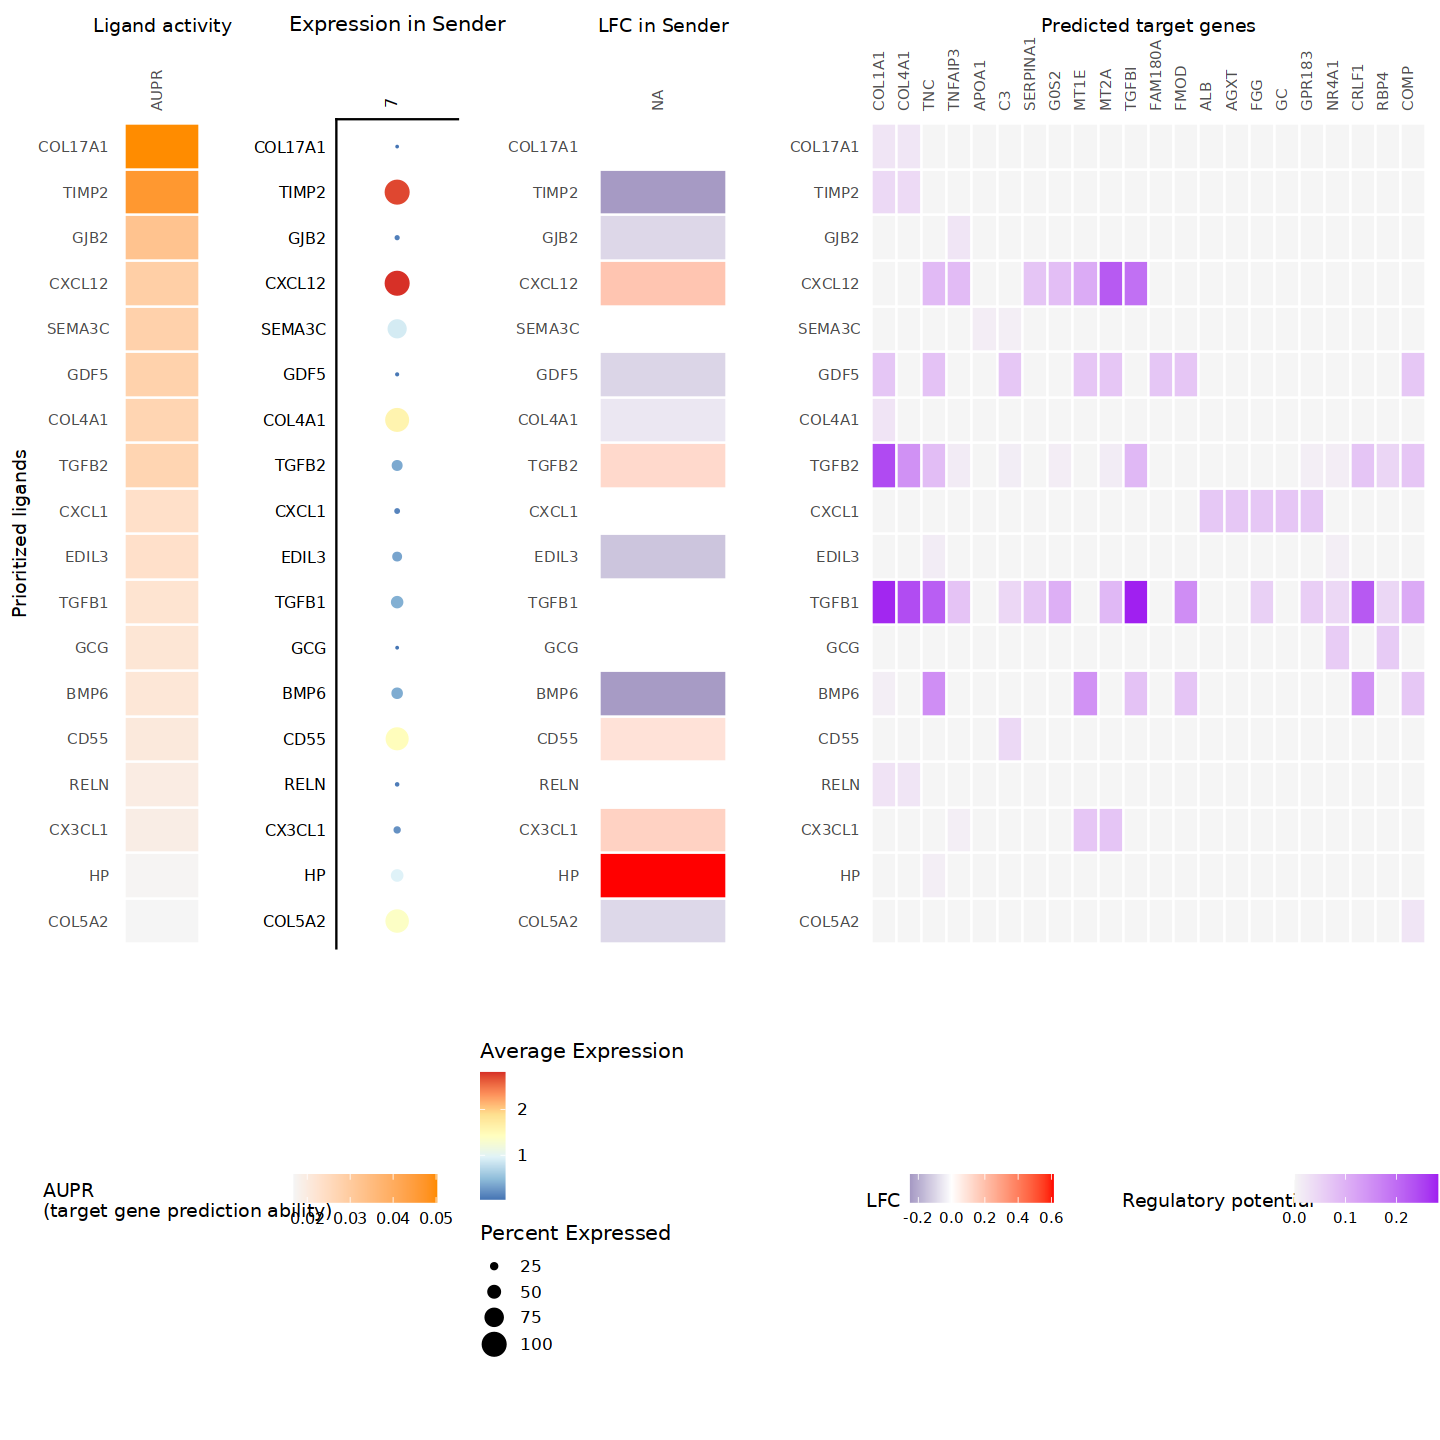

In [108]:
nichenet_output$ligand_activity_target_heatmap

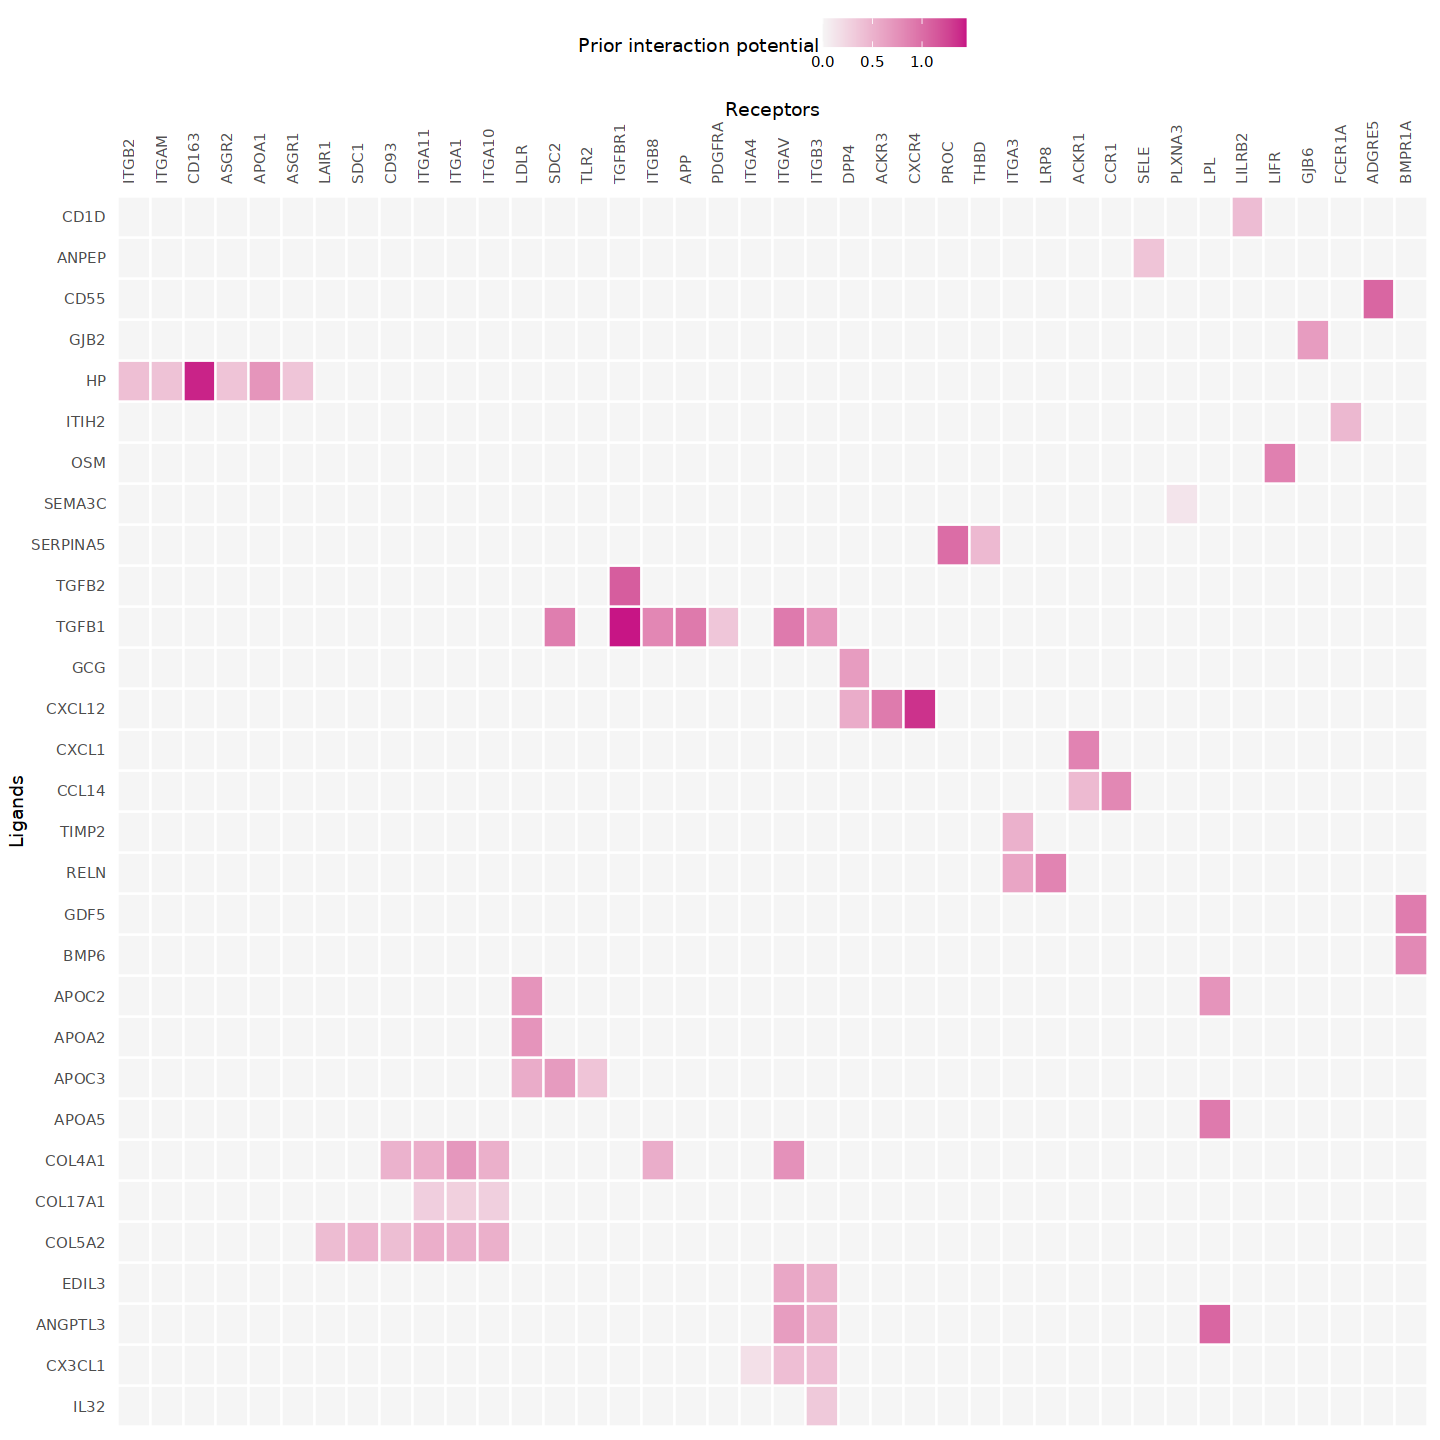

In [109]:
 nichenet_output$ligand_receptor_heatmap

In [110]:
options(repr.plot.width = 18,repr.plot.height = 5)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


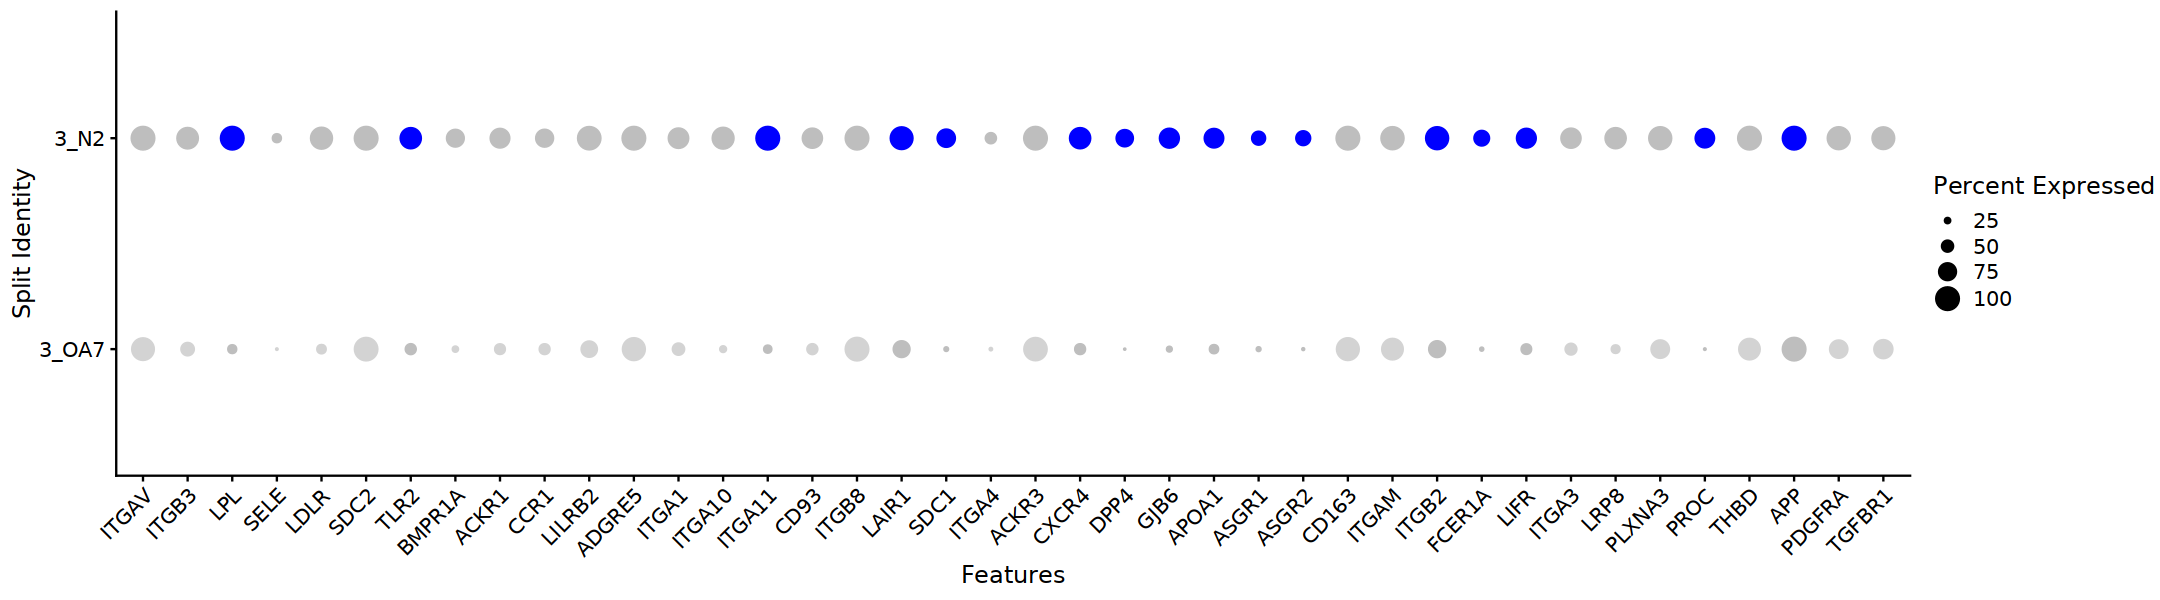

In [111]:
 DotPlot(seuratObj %>% subset(idents = "3"), 
             features = nichenet_output$top_receptors, 
             split.by = "orig.ident") + RotatedAxis()